# Real World Data

not a comprehensive statistical study, we want to get aquainted with the data. explore it and "find interesting things". also won't get into details for how to transform it for prediction tasks. just to get a "feel" of the data

---

### Table of contents

- The Dataset
    - Overview
    - Univariate Study
    - Multivariate and Focus


- Practical Tips
  - Outliers
  - Noise
  - Averages

---

In [1]:
import numpy as np
import pandas as pd

# customize table renders to be more appropriate for this dataset:
pd.options.display.max_columns = 30
# float format: thousands separator, max 2 decimal points, no trailing zeros
pd.options.display.float_format = lambda n: '{:,.2f}'.format(n).rstrip('0').rstrip('.')

In [2]:
import warnings; warnings.simplefilter('ignore', FutureWarning)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
# placing them in the same cell as above only works if you run the cell again
import matplotlib; matplotlib.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_format = 'retina'

## The Dataset

The dataset contains information about the top 5000 movies, as of 2016. Information scraped from IMDB and Facebook by [data.world](https://data.world). [Source](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

This particular dataset was chosen for the workshop because it is large enough, contains varied types of information, and is at least somewhat relatable to the majority of people. This is because one of the most important factors in successfully analyzing a dataset is domain expertise. Intuition plays a huge role in effective navigation.

Load the dataset in memory:

In [171]:
movies = pd.read_csv('movies.csv.zip')
# if you're following the online tutorial, use the following line instead:
# movies = pd.read_csv('https://github.com/stefan-niculae/viz-workshop/blob/master/movies.csv.zip?raw=true', compression='zip')

If you're lucky, you might get a description of what each column entails, hinting at how to interpret the rows and what to expect for each column.

**Data dictionary:**

| Variable                    | Description                                                  | Format                                 |
| :-------------------------- | :----------------------------------------------------------- | :------------------------------------- |
| `title`               | Original movie title                                         | unicode string                         |
| `year`                | Original release year                                        | 1916 through 2016                      |
| `genres`                    | Film categorization                                         | pipe separated categories              |
| `keywords`             | Plot description                           | pipe separated keywords(s)             |
| `country`                   | Production country                                           | categorical string                     |
| `language`                  | Original release language                                    | categorical string                     |
| `duration`                  | Original film duration                                               | minutes, integer                       |
| `content_rating`            | Parental advisory content rating                               | categorical string                     |
| `color`                     | Original colorization                                        | Color or Black and White               |
| `aspect_ratio`              | Film aspect ratio                                           | float (width/height)                   |
| `director`             | Main director                                        | first and last name(s)                 |
| `actor_1`              | Primary starring actor                          | first and last name(s)                 |
| `actor_2`              | Secondary starring actor                                       | first and last name(s)                 |
| `actor_3`              | Another starring actor                                       | first and last name(s)                 |
| `director_likes`   | Likes on `director`'s Facebook page                        | rounded to the nearest thousand        |
| `actor_1_likes`    | Likes on `actor_1`'s Facebook page                           | rounded to the nearest thousand        |
| `actor_2_likes`    | Likes on `actor_2`'s Facebook page                           | rounded to the nearest thousand        |
| `actor_3_likes`    | Likes on `actor_3`'s Facebook page                           | rounded to the nearest thousand |
| `cast_likes` | Total likes on Facebook pages the entire cast | count                                  |
| `movie_likes`      | Likes on the movie's Facebook page                           | count                                  |
| `poster_order`      | Order of the actor who featured in the poster          | zero-indexed                           |
| `score`                | IMDB score                                                   | float, out of ten                      |
| `n_votes`           | Votes on IMDB                                                | count                                  |
| `n_user_reviews`      | User reviews on IMDB                                         | count                                  |
| `n_critic_reviews`    | Critic reviews on IMDB                                       | count                                  |
| `imdb_link`           | IMDB link of the movie                                       | URL                                    |
| `gross`                     | Gross earnings                                  | USD, integer                           |
| `budget`                    | Total budget                                          | USD, integer                           |

### Initial Exploration

Check the number of rows and columns:

In [172]:
movies.shape

(5043, 28)

Check the type of each column (`object` refers to a string):

In [173]:
movies.dtypes

title                object
year                float64
genres               object
keywords             object
country              object
language             object
duration            float64
content_rating       object
color                object
aspect_ratio        float64
director             object
actor_1              object
actor_2              object
actor_3              object
director_likes      float64
actor_1_likes       float64
actor_2_likes       float64
actor_3_likes       float64
cast_likes            int64
movie_likes           int64
poster_order        float64
score               float64
n_votes               int64
n_user_reviews      float64
n_critic_reviews    float64
imdb_link            object
gross               float64
budget              float64
dtype: object

Check a sample of rows:

In [174]:
movies.head()

,title,year,genres,keywords,country,language,duration,content_rating,color,aspect_ratio,director,actor_1,actor_2,actor_3,director_likes,actor_1_likes,actor_2_likes,actor_3_likes,cast_likes,movie_likes,poster_order,score,n_votes,n_user_reviews,n_critic_reviews,imdb_link,gross,budget
0,Avatar,"2,009",Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,USA,English,178,PG-13,Color,1.78,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,0,"1,000",936,855,4834,33000,0,7.9,886204,"3,054",723,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"760,505,847","237,000,000"
1,Pirates of the Caribbean: At World's End,"2,007",Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,USA,English,169,PG-13,Color,2.35,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,563,"40,000","5,000","1,000",48350,0,0,7.1,471220,"1,238",302,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"309,404,152","300,000,000"
2,Spectre,"2,015",Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,UK,English,148,PG-13,Color,2.35,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,0,"11,000",393,161,11700,85000,1,6.8,275868,994,602,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,"200,074,175","245,000,000"
3,The Dark Knight Rises,"2,012",Action|Thriller,deception|imprisonment|lawlessness|police offi...,USA,English,164,PG-13,Color,2.35,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,"22,000","27,000","23,000","23,000",106759,164000,0,8.5,1144337,"2,701",813,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"448,130,642","250,000,000"
4,Star Wars: Episode VII - The Force Awakens ...,nan,Documentary,NaN,NaN,NaN,nan,NaN,NaN,nan,Doug Walker,Doug Walker,Rob Walker,NaN,131,131,12,nan,143,0,0,7.1,8,nan,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,nan


Look into more detail at one row:

In [175]:
movies.iloc[0]

title                                                         Avatar 
year                                                            2,009
genres                                Action|Adventure|Fantasy|Sci-Fi
keywords                       avatar|future|marine|native|paraplegic
country                                                           USA
language                                                      English
duration                                                          178
content_rating                                                  PG-13
color                                                           Color
aspect_ratio                                                     1.78
director                                                James Cameron
actor_1                                                   CCH Pounder
actor_2                                              Joel David Moore
actor_3                                                     Wes Studi
director_likes      

#### Cleaning

Drop duplicates:

In [176]:
movies.drop_duplicates(subset=['title', 'year'], inplace=True)
len(movies)

4919

There are few enough missing values that we don't need to worry about them:

In [552]:
pd.isna(movies).mean(axis=0)

title                 0
year               0.02
genres                0
keywords           0.03
country               0
language              0
duration              0
content_rating     0.06
color                 0
aspect_ratio       0.07
director           0.02
actor_1               0
actor_2               0
actor_3               0
director_likes     0.02
actor_1_likes         0
actor_2_likes         0
actor_3_likes         0
cast_likes            0
movie_likes           0
poster_order          0
score                 0
n_votes               0
n_user_reviews        0
n_critic_reviews   0.01
imdb_link             0
gross              0.18
budget              0.1
first_genre           0
first_two_genres      0
dtype: float64

### Univariate Exploration

We start by looking at each variable individually

#### Numerical Variables

Quick descriptive statistics:

In [10]:
movies.describe()

,year,duration,aspect_ratio,director_likes,actor_1_likes,actor_2_likes,actor_3_likes,cast_likes,movie_likes,poster_order,score,n_votes,n_user_reviews,n_critic_reviews,gross,budget
count,"4,935","5,028","4,714","4,939","5,036","5,030","5,020","5,043","5,043","5,030","5,043","5,043","5,022","4,993","4,159","4,551"
mean,"2,002.47",107.2,2.22,686.51,"6,560.05","1,651.75",645.01,"9,699.06","7,525.96",1.37,6.44,"83,668.16",272.77,140.19,"48,468,407.53","39,752,620.44"
std,12.47,25.2,1.39,"2,813.33","15,020.76","4,042.44","1,665.04","18,163.8","19,320.45",2.01,1.13,"138,485.26",377.98,121.6,"68,452,990.44","206,114,898.45"
min,"1,916",7,1.18,0,0,0,0,0,0,0,1.6,5,1,1,162,218
25%,"1,999",93,1.85,7,614,281,133,"1,411",0,0,5.8,"8,593.5",65,50,"5,340,987.5","6,000,000"
50%,"2,005",103,2.35,49,988,595,371.5,"3,090",166,1,6.6,"34,359",156,110,"25,517,500","20,000,000"
75%,"2,011",118,2.35,194.5,"11,000",918,636,"13,756.5","3,000",2,7.2,"96,309",326,195,"62,309,437.5","45,000,000"
max,"2,016",511,16,"23,000","640,000","137,000","23,000","656,730","349,000",43,9.5,"1,689,764","5,060",813,"760,505,847","12,215,500,000"


As there are quite a number of them, a visual representation is easier to interpret:

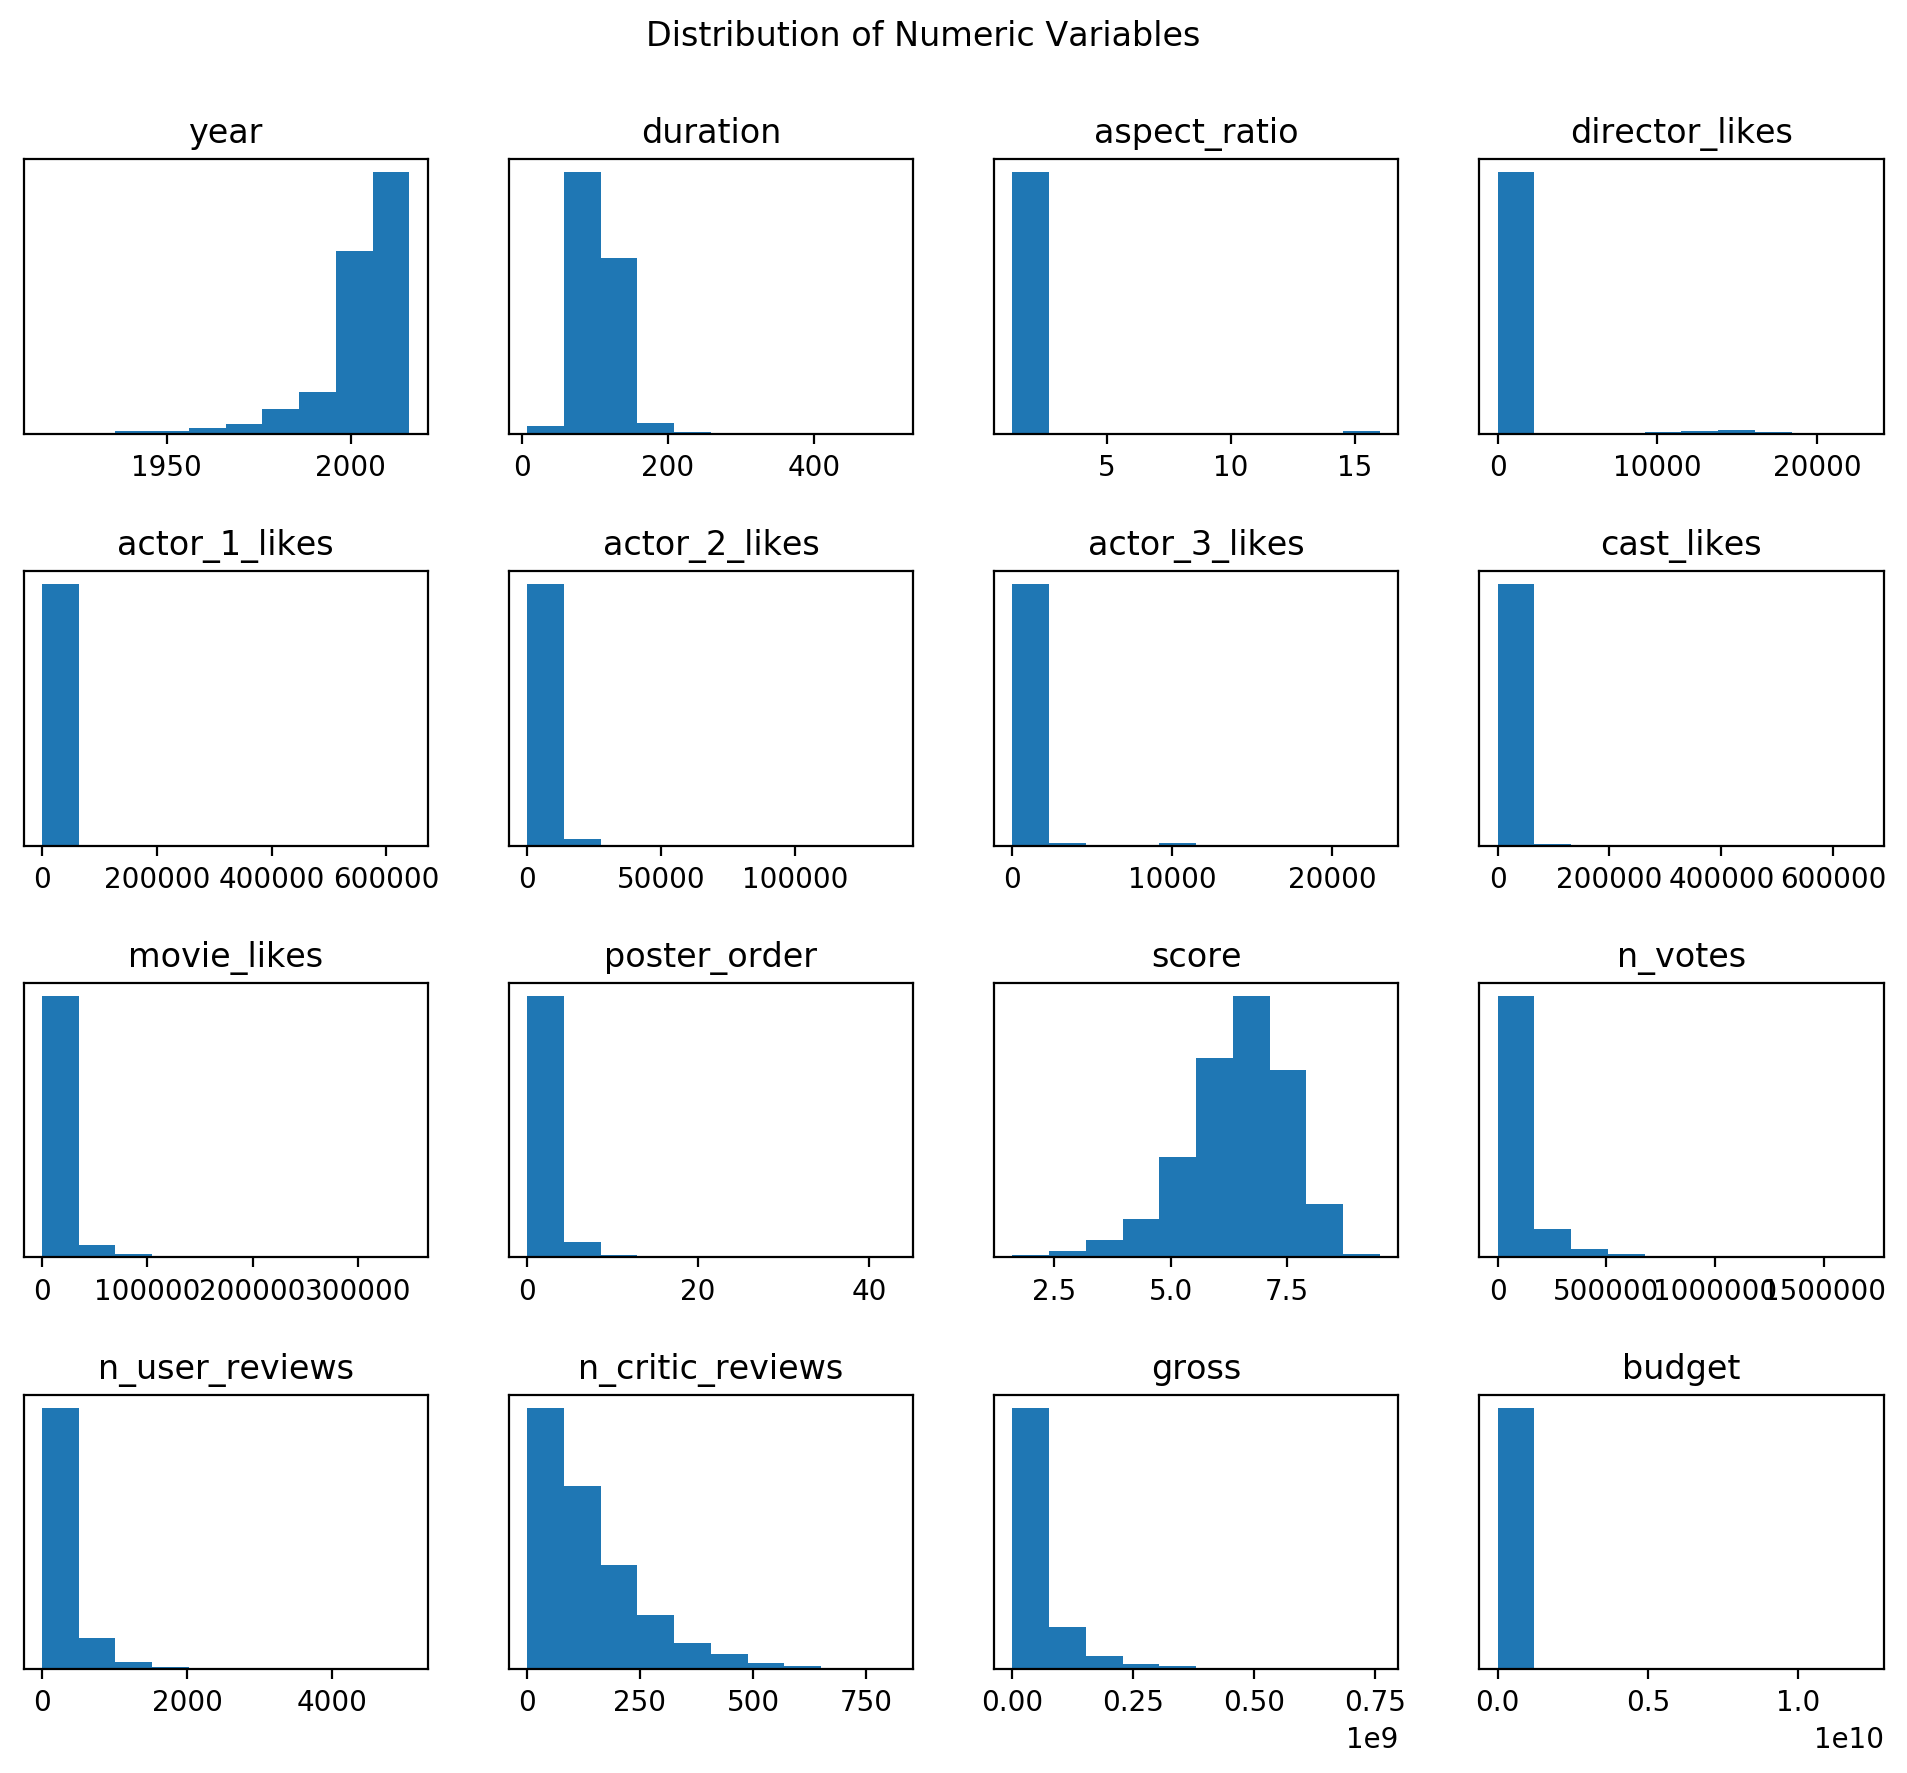

In [11]:
numeric_vars = movies.describe().columns

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=.5)
plt.suptitle('Distribution of Numeric Variables', y=.95)

for k, col in enumerate(numeric_vars):
    plt.subplot(4, 4, k + 1)
    movies[col].plot('hist')
    
    plt.ylabel(None)
    plt.yticks([])
    plt.title(col)

This is useful for some of them (like `year`, `duration`, `score` or `n_critic_reviews`), but the outliers in the other columns render the histogram useless. Outlier handling is explored in a later section, but for our current purposes, ignoring them is sufficient. 

Another trick we can employ is ignoring very low like amounts — since they are likely an artefact of data collection.

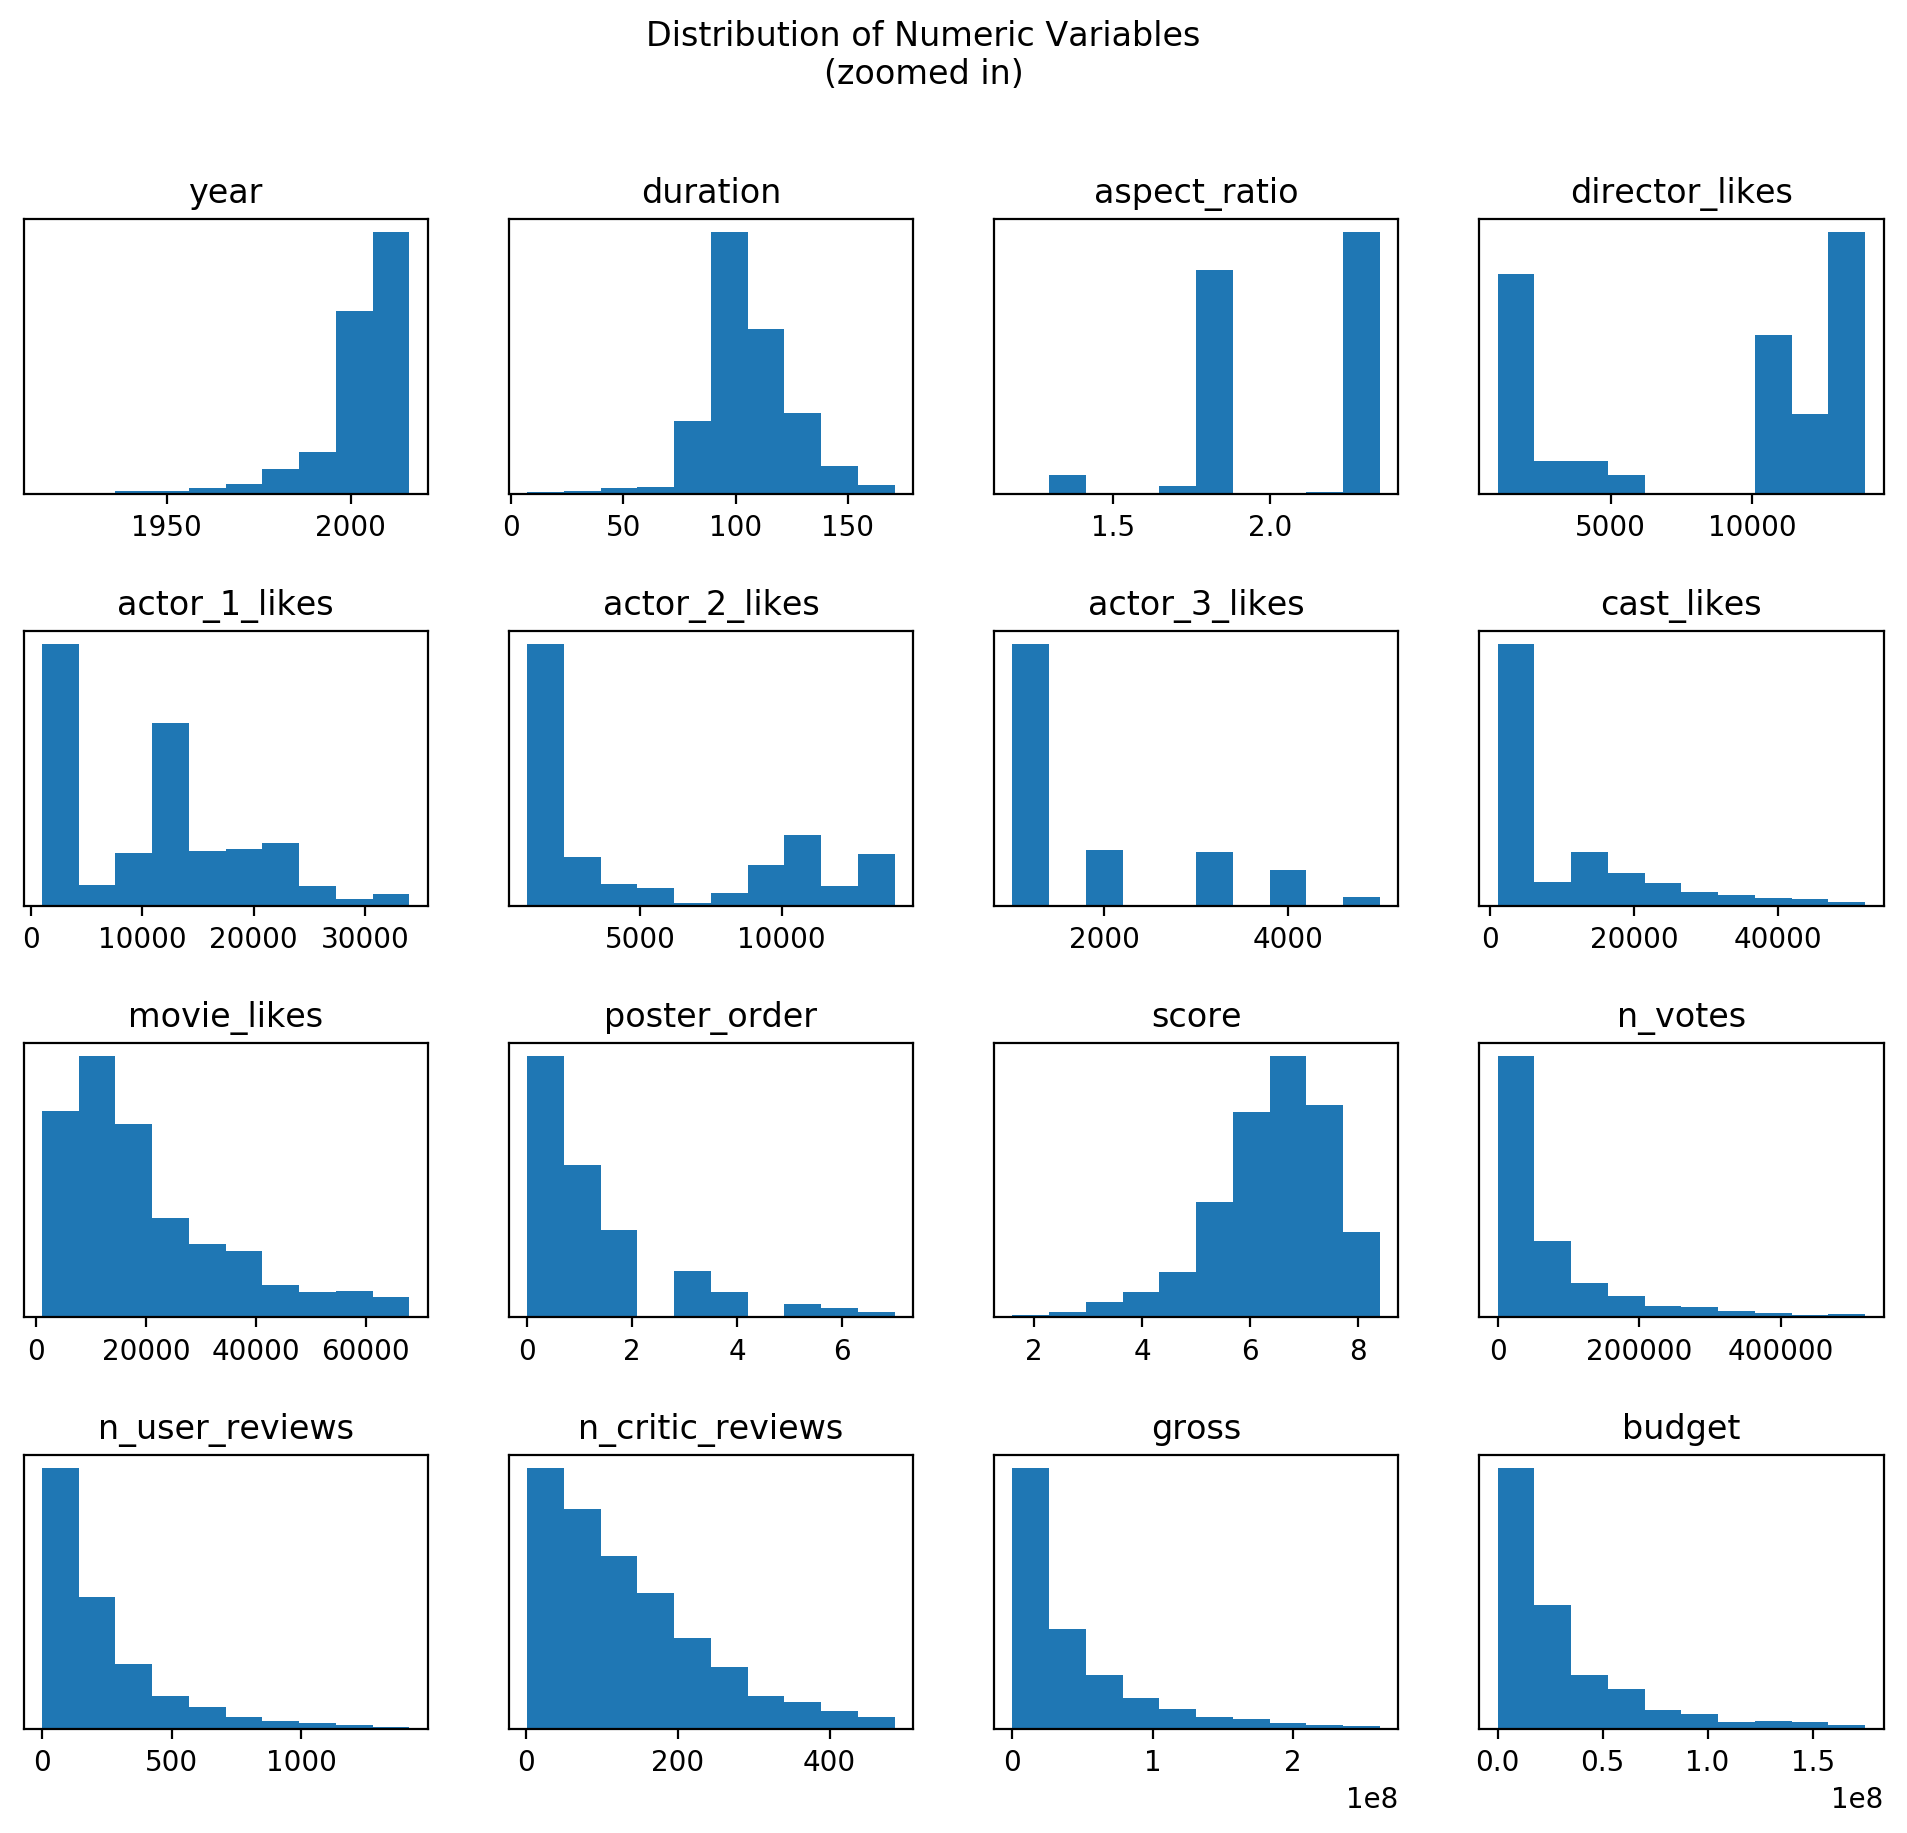

In [12]:
ignored_per = .02
min_likes = 1_000

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=.5)
plt.suptitle(f'Distribution of Numeric Variables\n(zoomed in)')

for k, col in enumerate(numeric_vars):
    values = movies[col]

    # ignore outliers
    max_val = values.quantile(1 - ignored_per)
    values = values[values <= max_val]
    
    # show only relevant likes
    if col.endswith('_likes'):
        values = values[values >= min_likes]
    
    plt.subplot(4, 4, k + 1)
    values.plot('hist')
    
    plt.ylabel(None)
    plt.yticks([])
    plt.title(col)

#### Nominal Variables

Similar to histograms for numerical columns, for categorical ones, we can visualize them using frequency charts

In [13]:
non_numeric_vars = set(movies.columns) - set(numeric_vars)
nominal_vars = {col for col in non_numeric_vars if movies[col].nunique() <= 100}

**ℹ️ Tip**: while `aspect_ratio` is a _categorical_ variable, in this section we are looking just at _nominal_ ones. In fact, `year` and `poster_order` are categorical variables as well, but they are _ordinal_. These three mentioned variables are sufficiently described by the previous histogram technique.

In [14]:
def compute_value_counts(columns):
    return pd.Series({
        col: movies[col].nunique()
        for col in columns
    }, name='n_unique_values')

In [15]:
compute_value_counts(nominal_vars)

color              2
country           65
language          47
content_rating    18
Name: n_unique_values, dtype: int64

In [16]:
def plot_value_counts(columns, title_preffix, top, title_y, figsize, subplots_wspace):
    fig, axes = plt.subplots(1, len(columns), figsize=figsize, sharex=True)
    plt.subplots_adjust(wspace=.6)
    fig.suptitle(f'Value Counts for {title_preffix} Variables\n(top {top} values)', y=title_y)

    for ax, col in zip(axes, columns):
        counts = movies[col].value_counts()
        counts[:top].plot('barh', color='C0', ax=ax)

        ax.invert_yaxis()  # larger values first
        ax.set_title(col)
        ax.set_xlabel('#Movies')

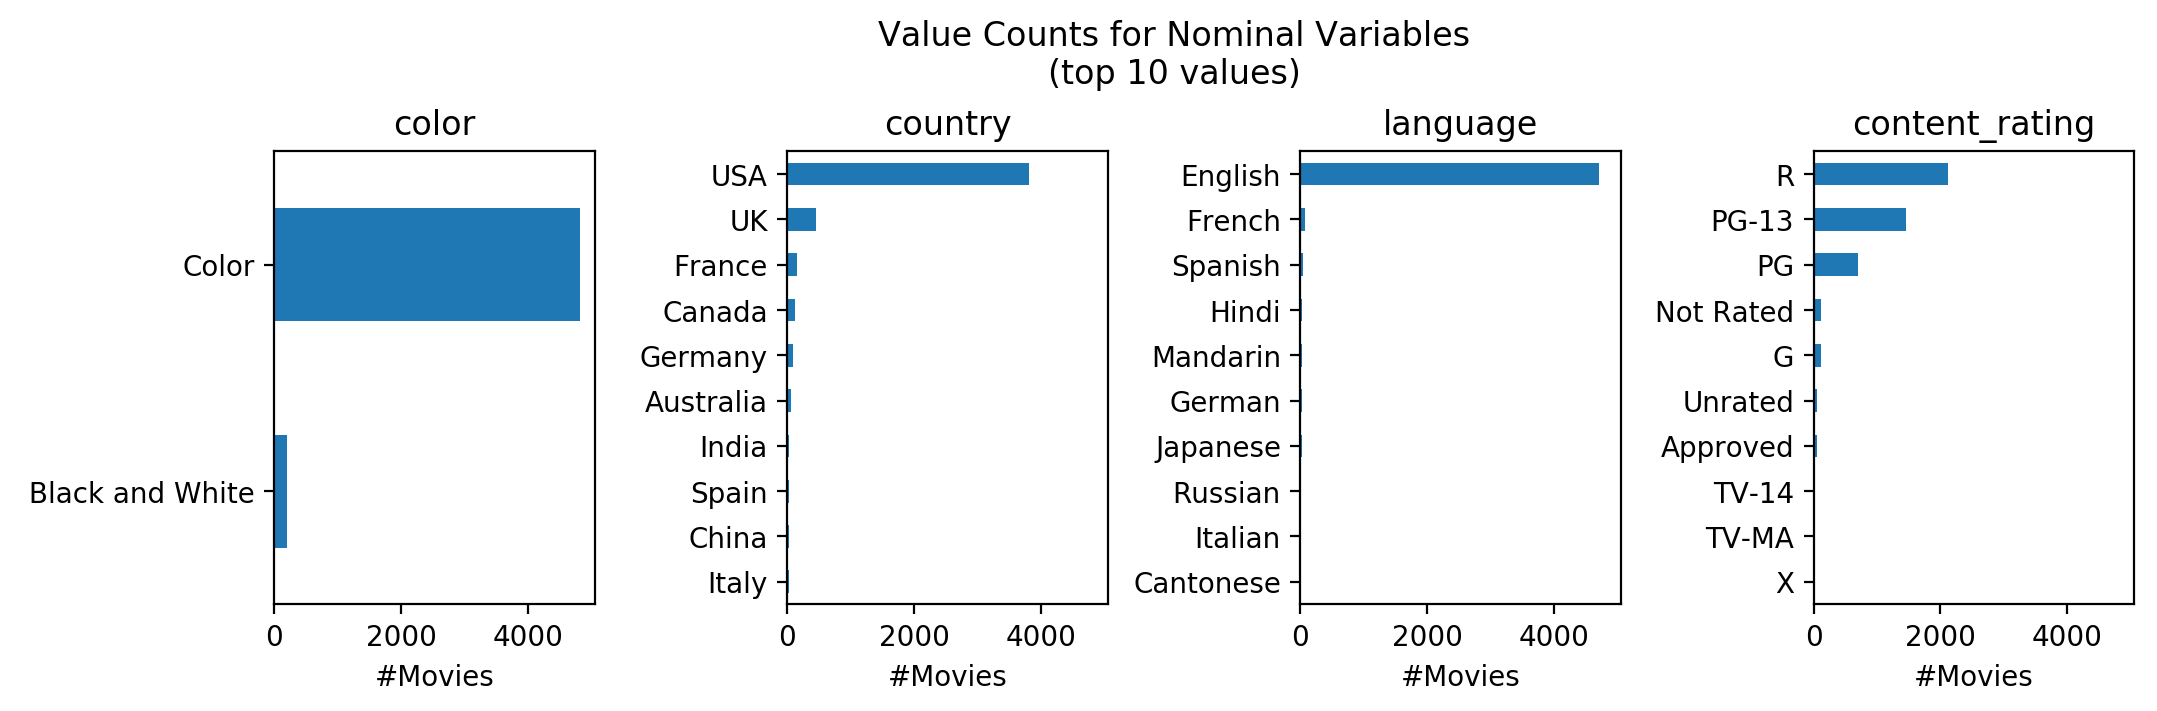

In [17]:
plot_value_counts(nominal_vars, 'Nominal', top=10, title_y=1.1, figsize=(12, 3), subplots_wspace=.6)

---

For `genres` and `keywords`, since they're composite variables (each movie has multiple genres), we have to do a little preprocessing first:

In [18]:
composite_vars = {'genres', 'keywords'}

In [19]:
compute_value_counts(composite_vars)

genres       914
keywords    4760
Name: n_unique_values, dtype: int64

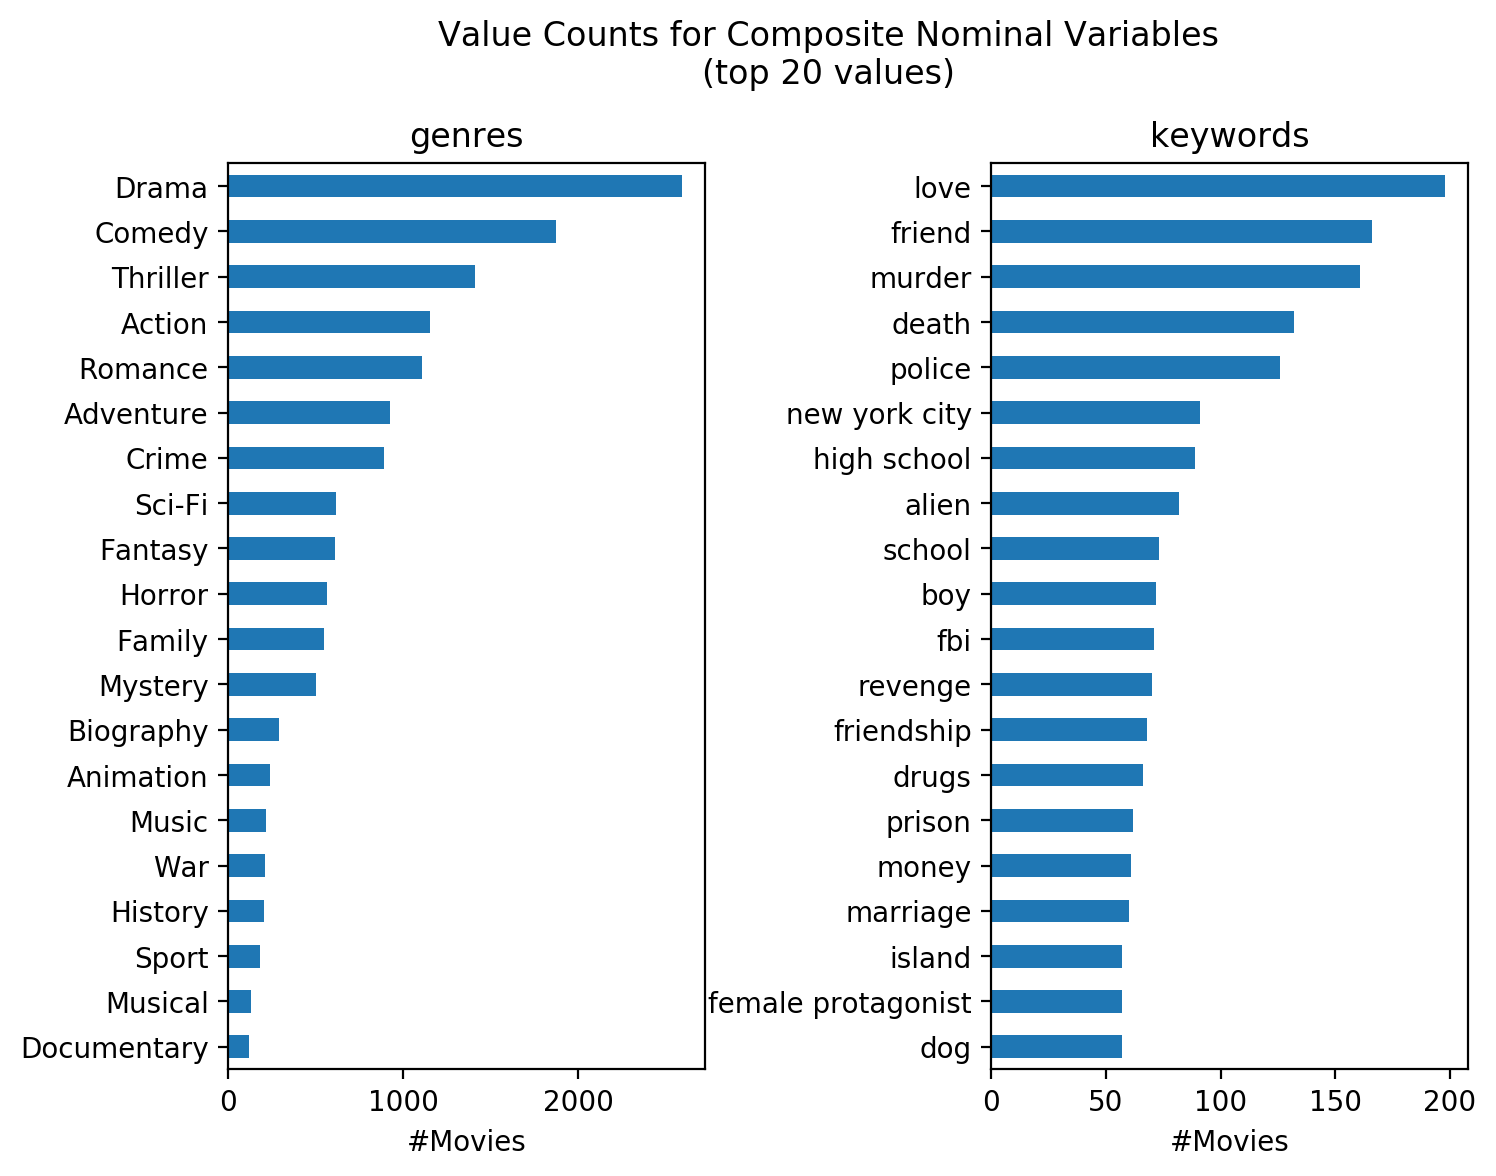

In [20]:
fig, axes = plt.subplots(1, len(composite_vars), figsize=(8, 6))
plt.subplots_adjust(wspace=.6)
fig.suptitle('Value Counts for Composite Nominal Variables\n(top 20 values)', y=1)

for ax, col in zip(axes, composite_vars):
    values = movies[col]
    values = values[~values.isnull()]  # ignore missing values for now
    values = values.str.split('|')  # split by separator
    
    all_values = sum(values, [])
    counts = pd.value_counts(all_values)
    
    counts[:20].plot('barh', color='C0', ax=ax)

    ax.invert_yaxis()  # larger values first
    ax.set_title(col)
    ax.set_xlabel('#Movies')

Note the different X-axes ranges!

---

For the rest of variables, there is unfortunately not much we can do in terms of visualizing frequencies.

In [21]:
loosely_nominal_vars = non_numeric_vars - nominal_vars - composite_vars - {'imdb_link', 'title'}

**ℹ️ Tip**: `imdb_link` and `title` are _identifiying_ variables, which we know do not (or should not) repeat

In [22]:
compute_value_counts(loosely_nominal_vars)

actor_2     3032
actor_3     3521
director    2398
actor_1     2097
Name: n_unique_values, dtype: int64

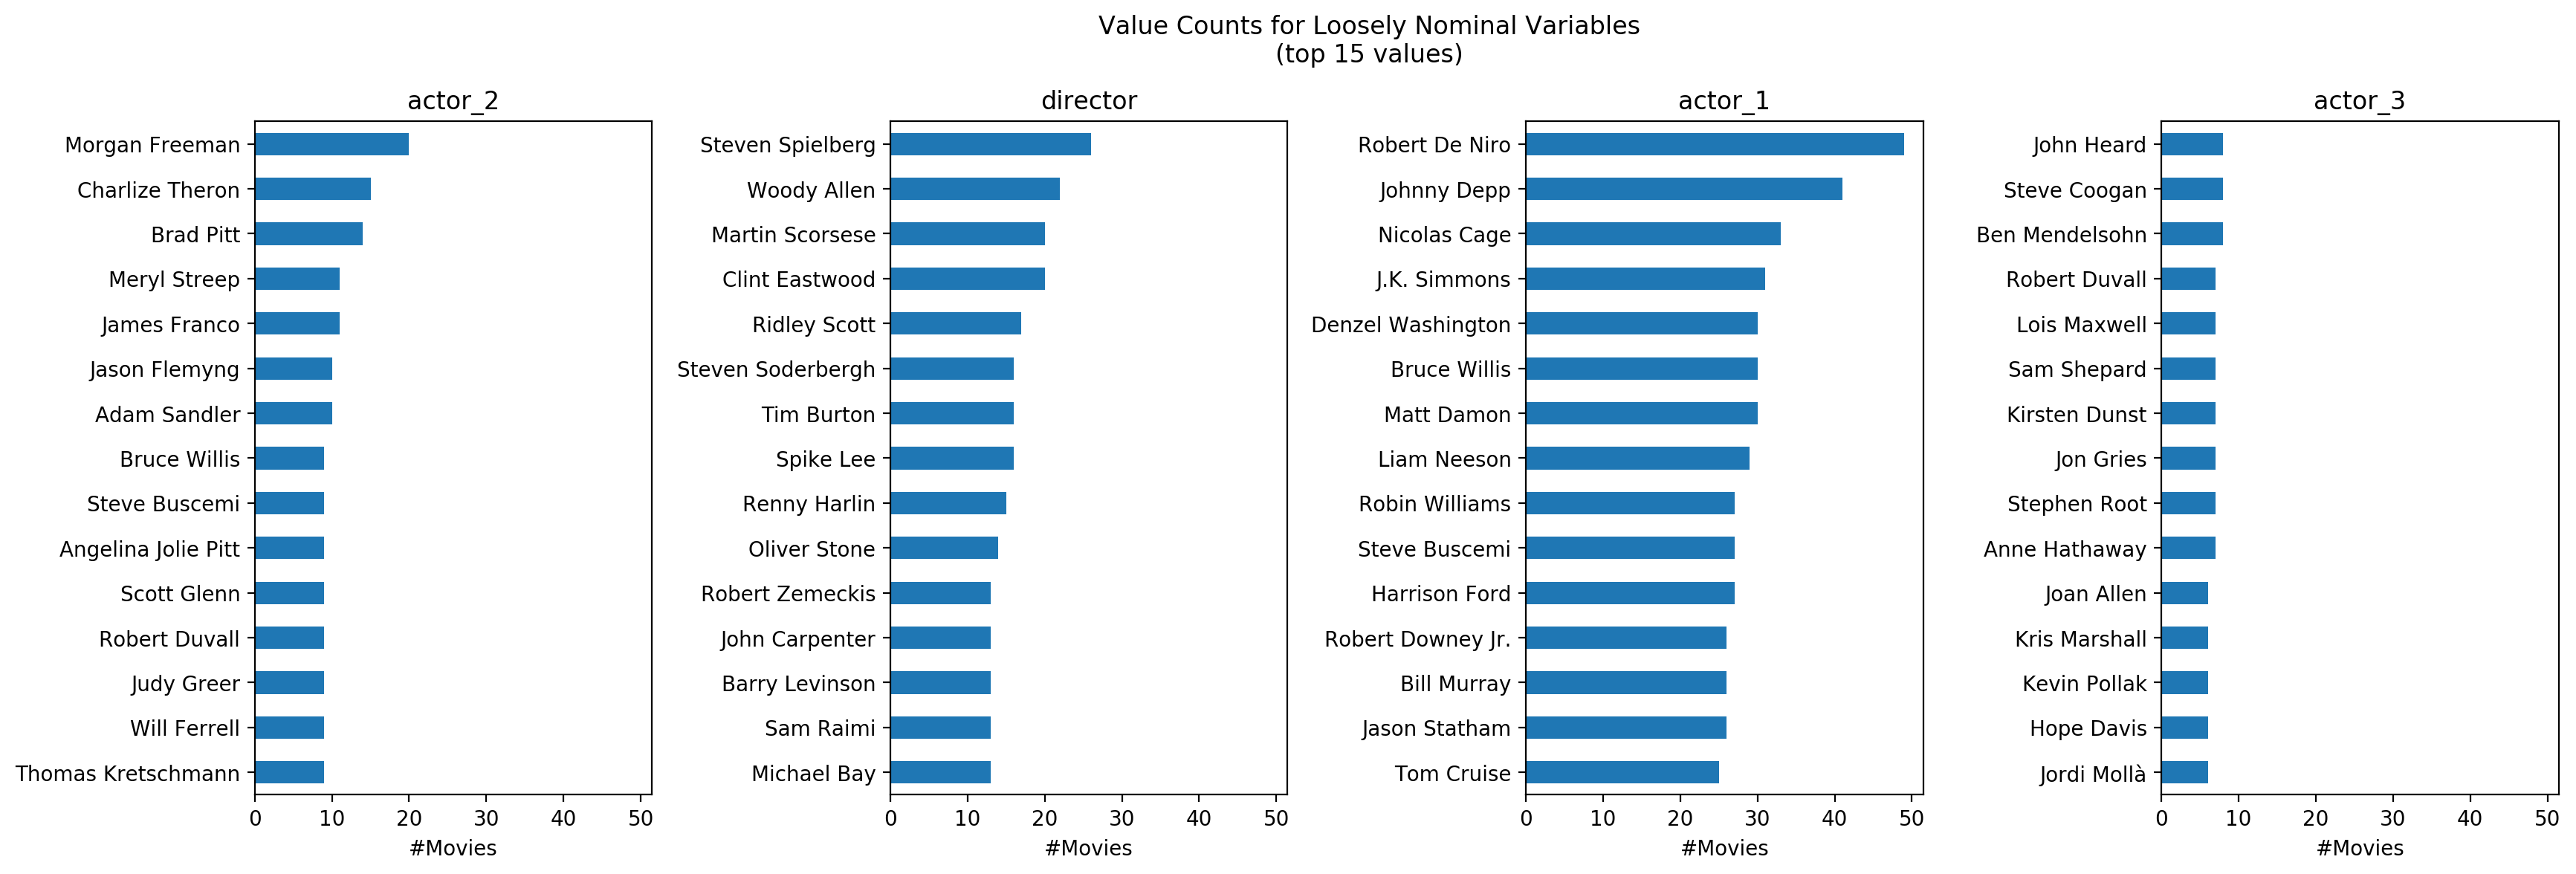

In [85]:
plot_value_counts(loosely_nominal_vars, 'Loosely Nominal', top=15, title_y=1, figsize=(20, 6), subplots_wspace=.9)

Since the `actor_x` variables store the same kind of data, it can be useful to see an overall count of them:

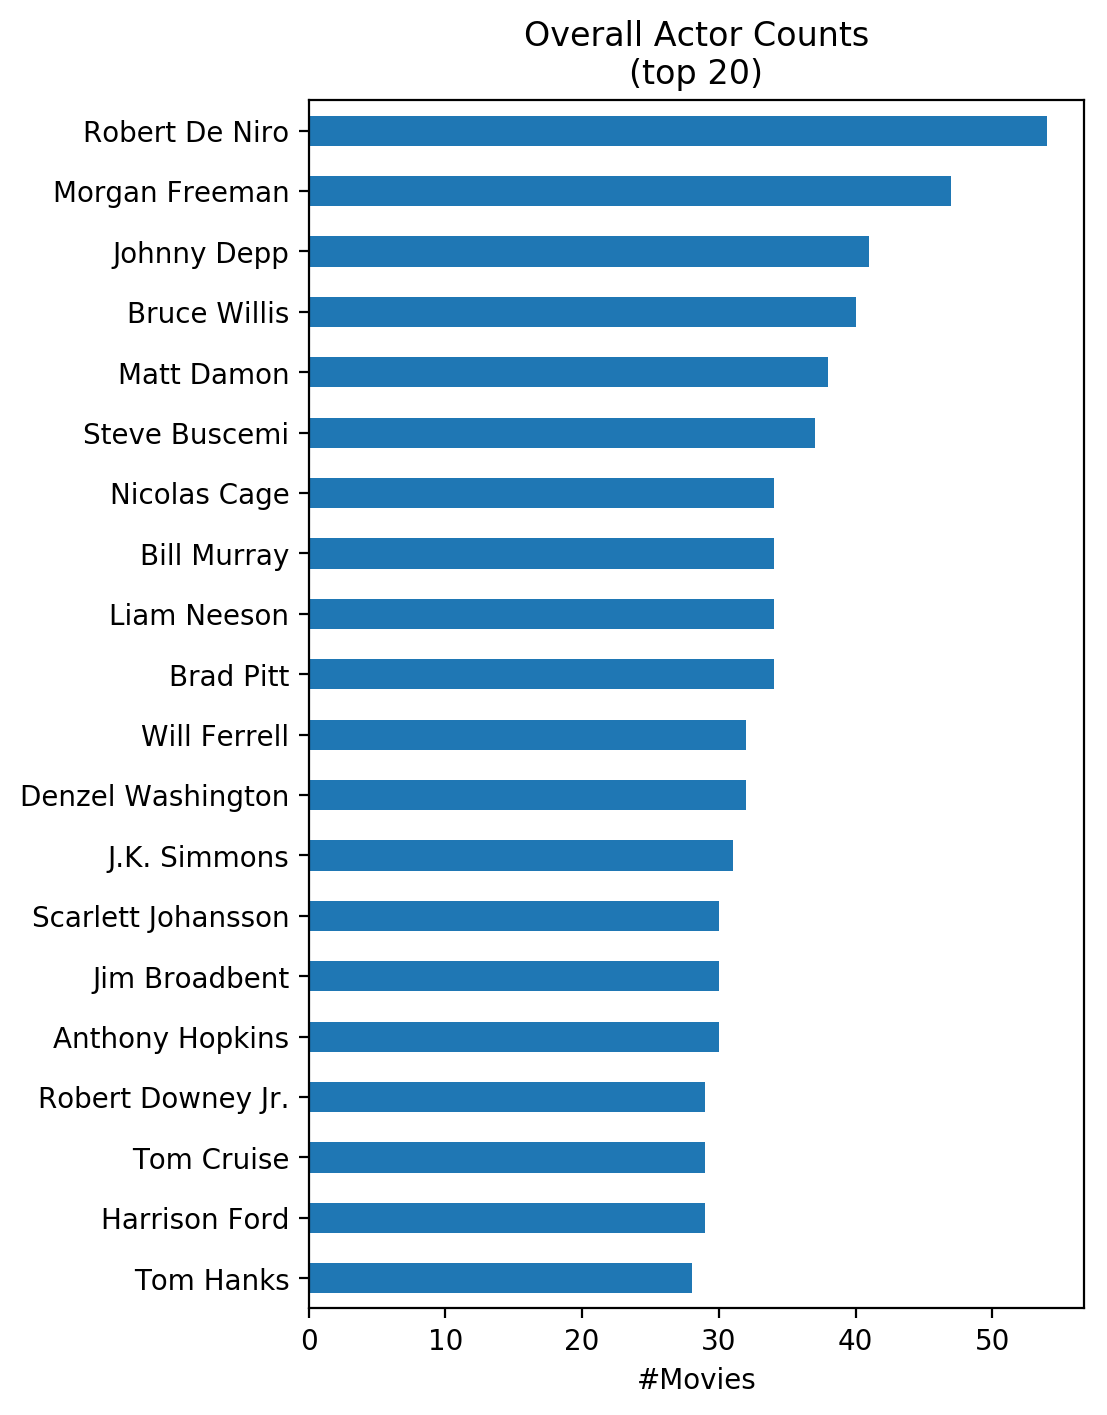

In [28]:
values = np.concatenate([movies.actor_1, movies.actor_2, movies.actor_3])
counts = pd.value_counts(values)

plt.figure(figsize=(5, 8))
counts[:20].plot('barh', color='C0')

plt.gca().invert_yaxis()  # larger values first
plt.title('Overall Actor Counts\n(top 20)')
plt.xlabel('#Movies');

**ℹ️ Tip**: textual columns

### Multivariate

We will focus on the IMDB score and dependent variable (it is not a definitive measure of movie quality, but a relevant proxy, which is also collaborated by a large amount of people), and the year as an interesting independent variable.

In [47]:
from matplotlib.ticker import FuncFormatter

In [92]:
# sns.set()
# sns.reset_orig()
matplotlib.rcParams['figure.figsize'] = (8, 5)

---

Looking closer at it, the scores follow a normal distribution, which is to be expected since they are obtained organically:

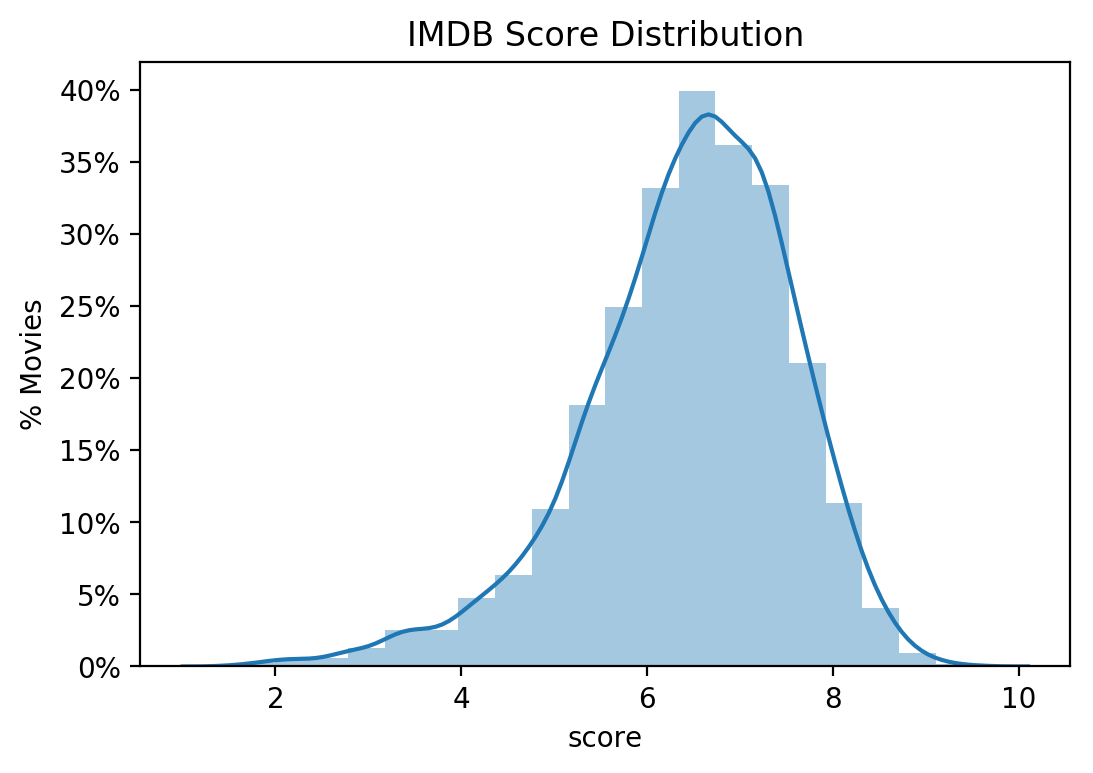

In [158]:
sns.distplot(movies.score, bins=20)

plt.title('IMDB Score Distribution')
plt.gca().xaxis.grid(False)

plt.ylabel('% Movies')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y:.0%}'));

---

Are newer movies perceived as better?

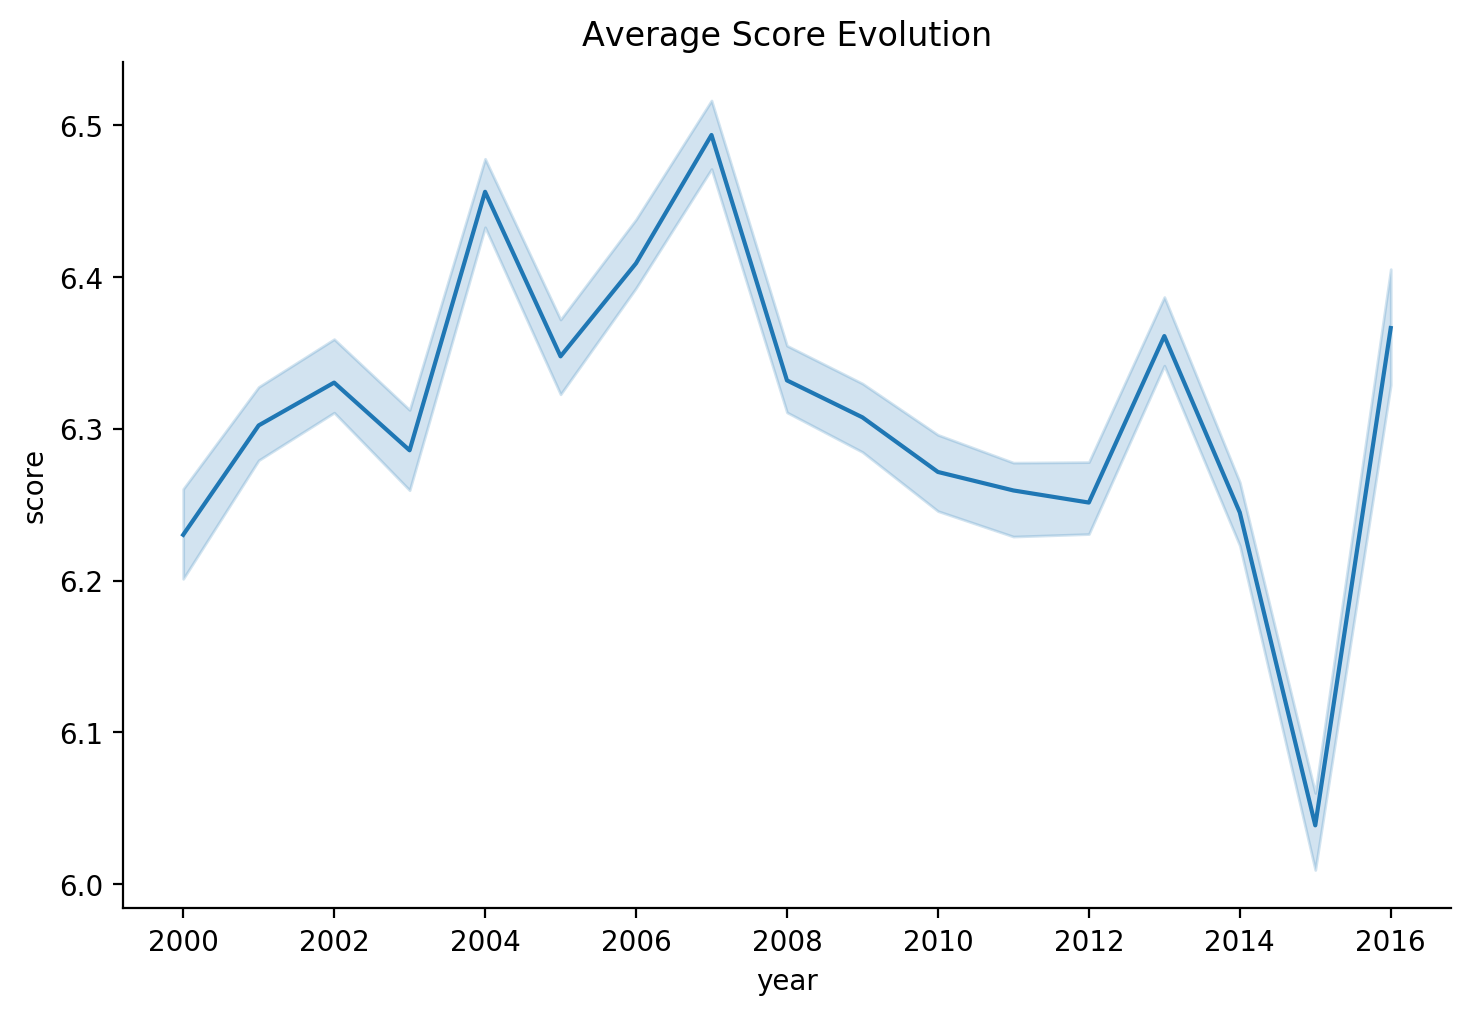

In [179]:
g = sns.relplot(x='year', y='score', 
                kind='line', ci=25, 
                data=movies[movies.year >= 2000])
g.fig.set_size_inches(8, 5)
plt.title('Average Score Evolution');

Note the Y-axis range!

---

Are more expensive movies better?

In [657]:
movies['score_bucket'] = movies.score.round(0)

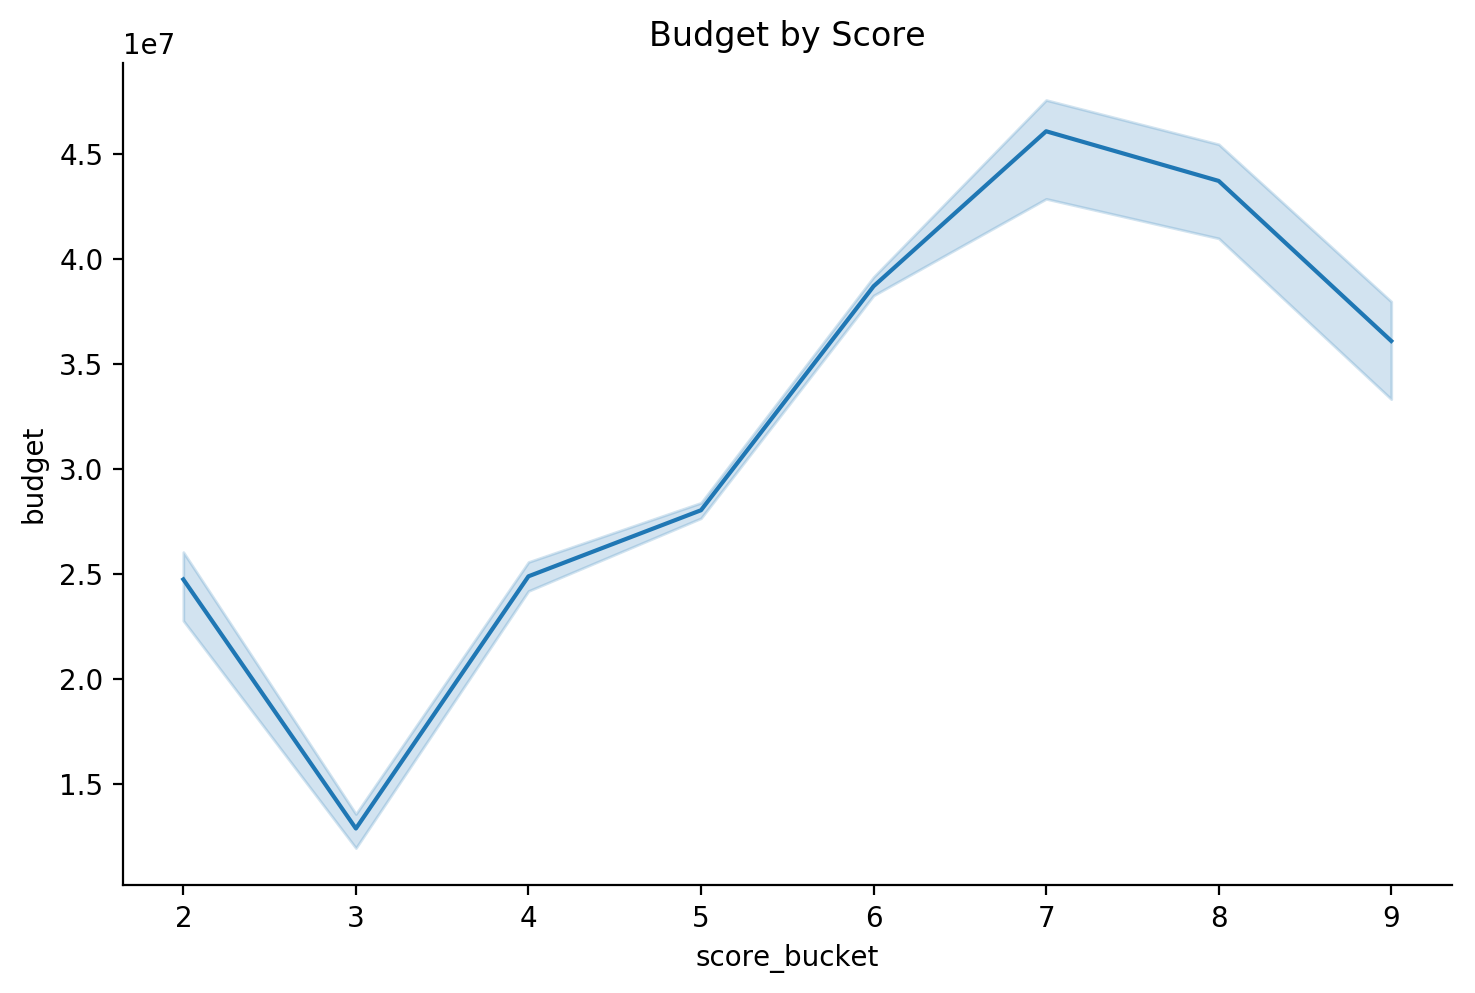

In [161]:
g = sns.relplot(x='score_bucket', y='budget', 
               kind='line', ci=25,
               data=movies)
g.fig.set_size_inches(8, 5)
plt.title('Budget by Score');

**ℹ️ Tip**: in order to compare on the same scale, the budget should be adjusted for inflation. For example, `$1,000` in 1916 have the same purchasing power as `$22,010` in 2016 ([source](https://www.usinflationcalculator.com)).

---

A better measure is the _return on investment_:

In [652]:
movies['profitability'] = movies.gross / movies.budget

max_val = movies.profitability.quantile(.98)
movies.loc[movies.profitability > max_val, 'profitability'] = max_val

In [655]:
movies.profitability.describe(percentiles=[.02, .25, .5, .75, .98])

count   3,790
mean     2.12
std      3.31
min         0
2%          0
25%      0.44
50%      1.07
75%      2.22
98%     18.11
max     18.11
Name: profitability, dtype: float64

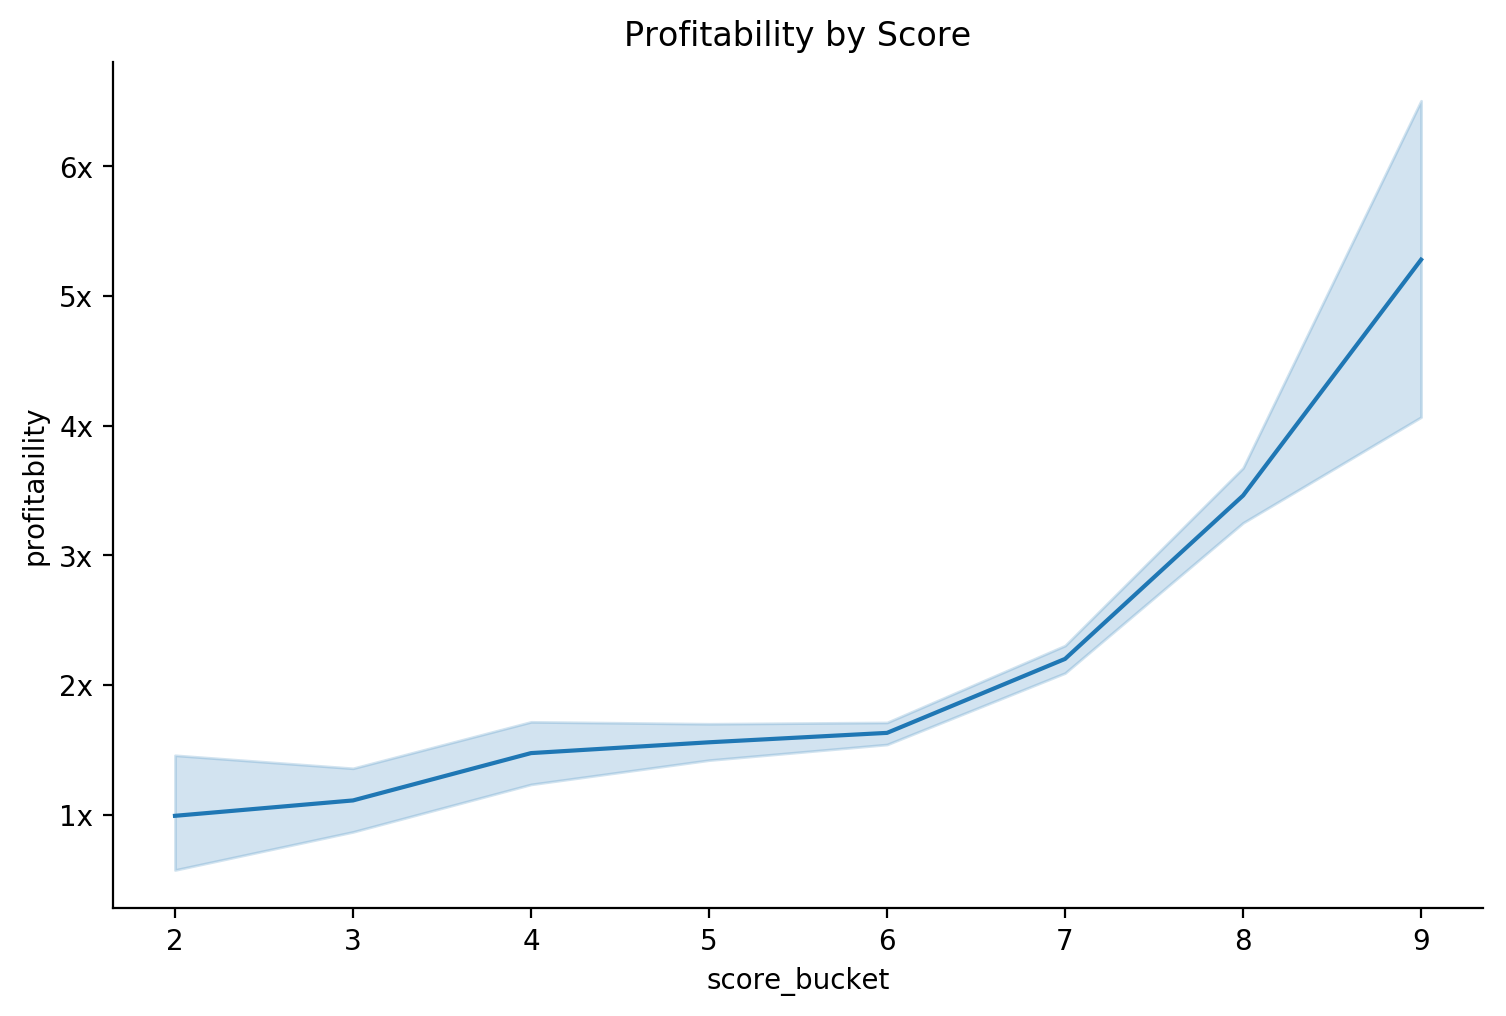

In [667]:
g = sns.relplot(x='score_bucket', y='profitability', 
               kind='line', ci=75,
               data=movies)
g.fig.set_size_inches(8, 5)
plt.gca().set_yticklabels([f'{y:.0f}x' for y in plt.gca().get_yticks()])
plt.title('Profitability by Score');

---

We can zoom in and check individual movies:

In [163]:
from adjustText import adjust_text

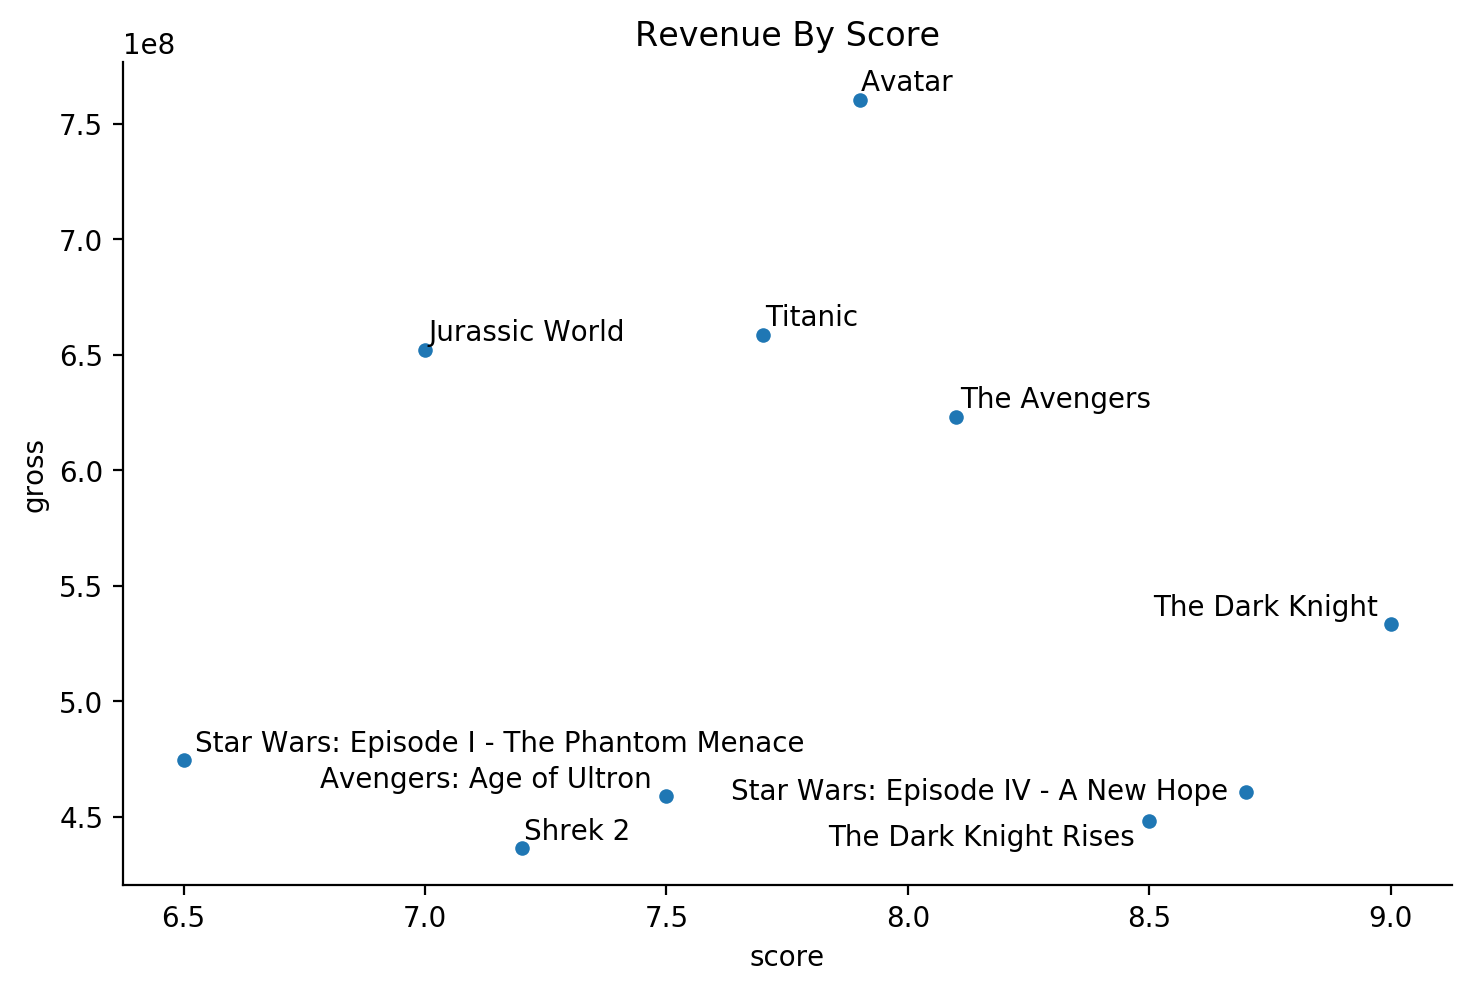

In [235]:
highest_earning = movies.sort_values('gross', ascending=False)[:10]

g = sns.relplot(x='score', y='gross', data=highest_earning)
g.fig.set_size_inches(8, 5)

texts = [plt.text(x=highest_earning.score.iloc[i], 
                  y=highest_earning.gross.iloc[i], 
                  s=highest_earning.title.iloc[i],
                  ha='center', va='center')
        for i in range(len(highest_earning))]
adjust_text(texts)

plt.title('Revenue By Score');

---

How do the like counts relate among actors?

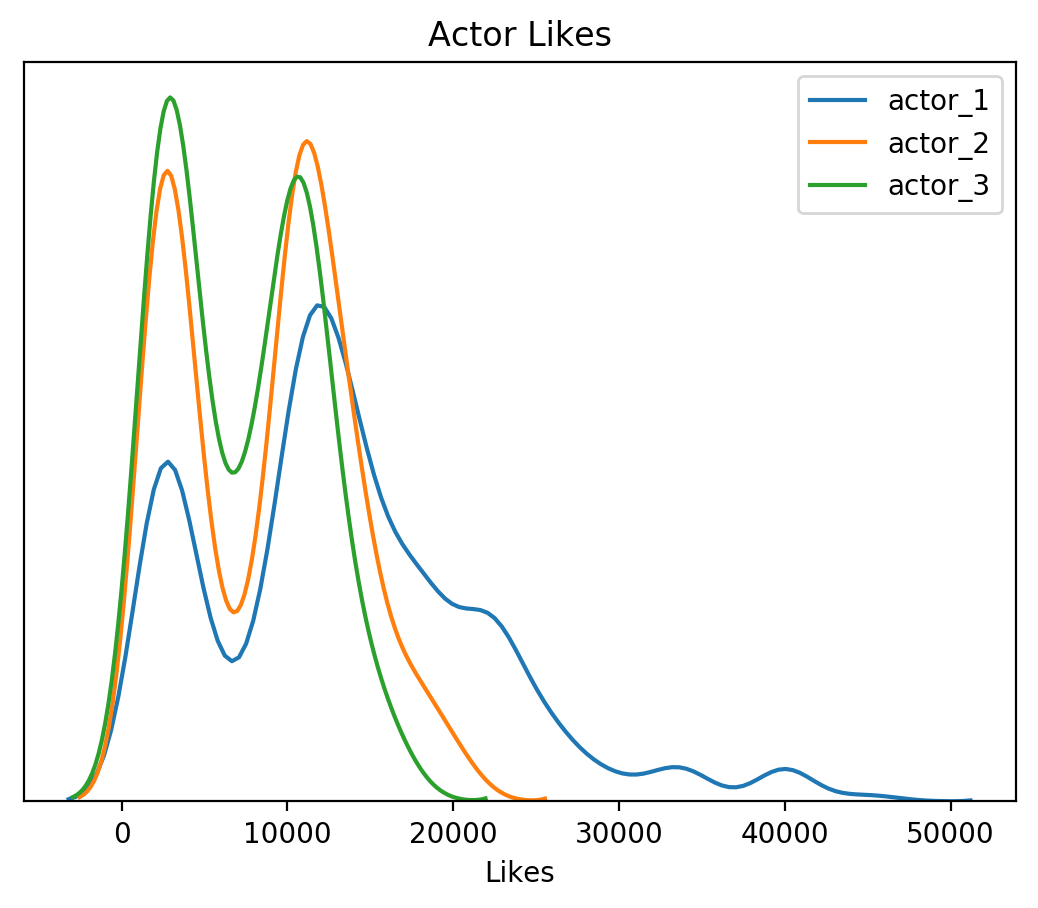

In [688]:
for col in movies:
    if 'actor' in col and 'likes' in col:
        values = movies[col]
        values = values[values > 1000]
        values = values[values < values.quantile(.98)]
        sns.kdeplot(values, label=col[:-len('_likes')])
        
plt.yticks([])
plt.title('Actor Likes')
plt.xlabel('Likes');

But among other crew members?

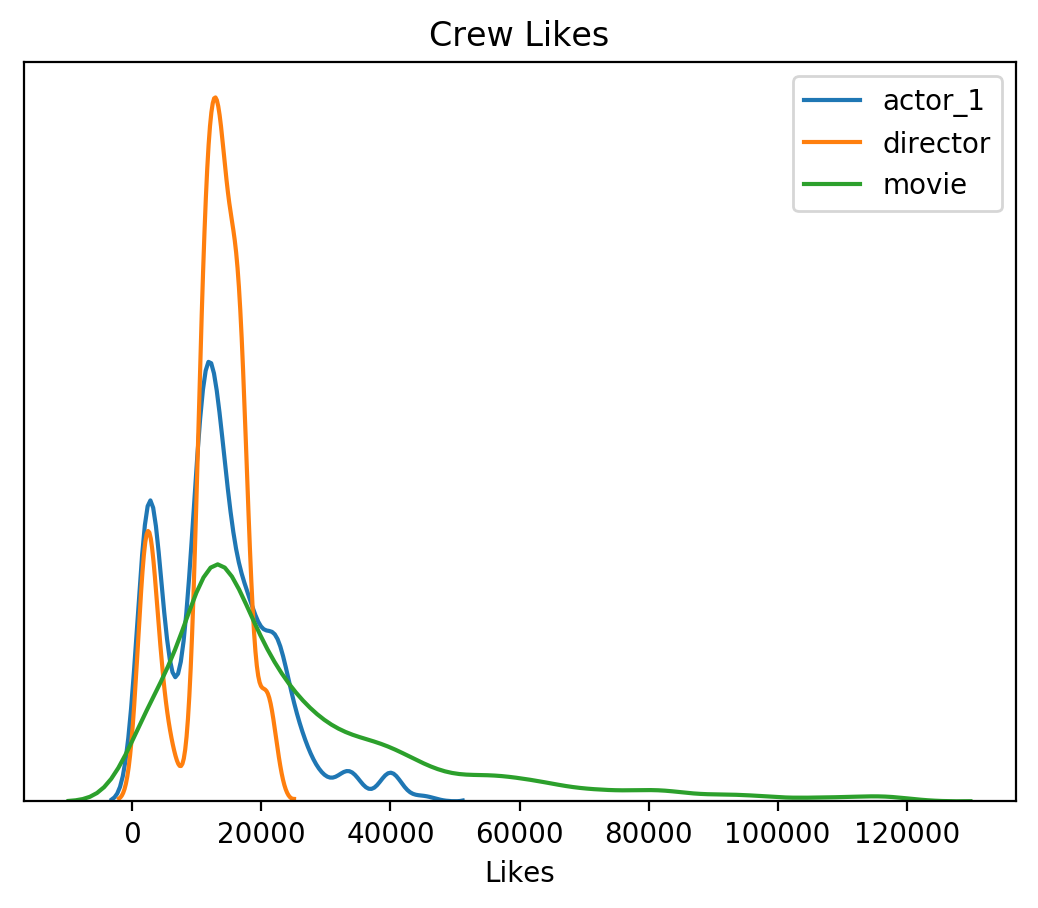

In [689]:
for col in ['actor_1_likes', 'director_likes', 'movie_likes']:
    values = movies[col]
    values = values[values > 1000]
    values = values[values < values.quantile(.98)]
    sns.kdeplot(values, label=col[:-len('_likes')])
    
plt.yticks([])
plt.title('Crew Likes')
plt.xlabel('Likes');

---

We might come across columns in which there is not much variation:

In [425]:
movies['first_genre'] = movies.genres.str.split('|').map(lambda l: l[0])

In [450]:
common_genres = movies.first_genre.value_counts().index

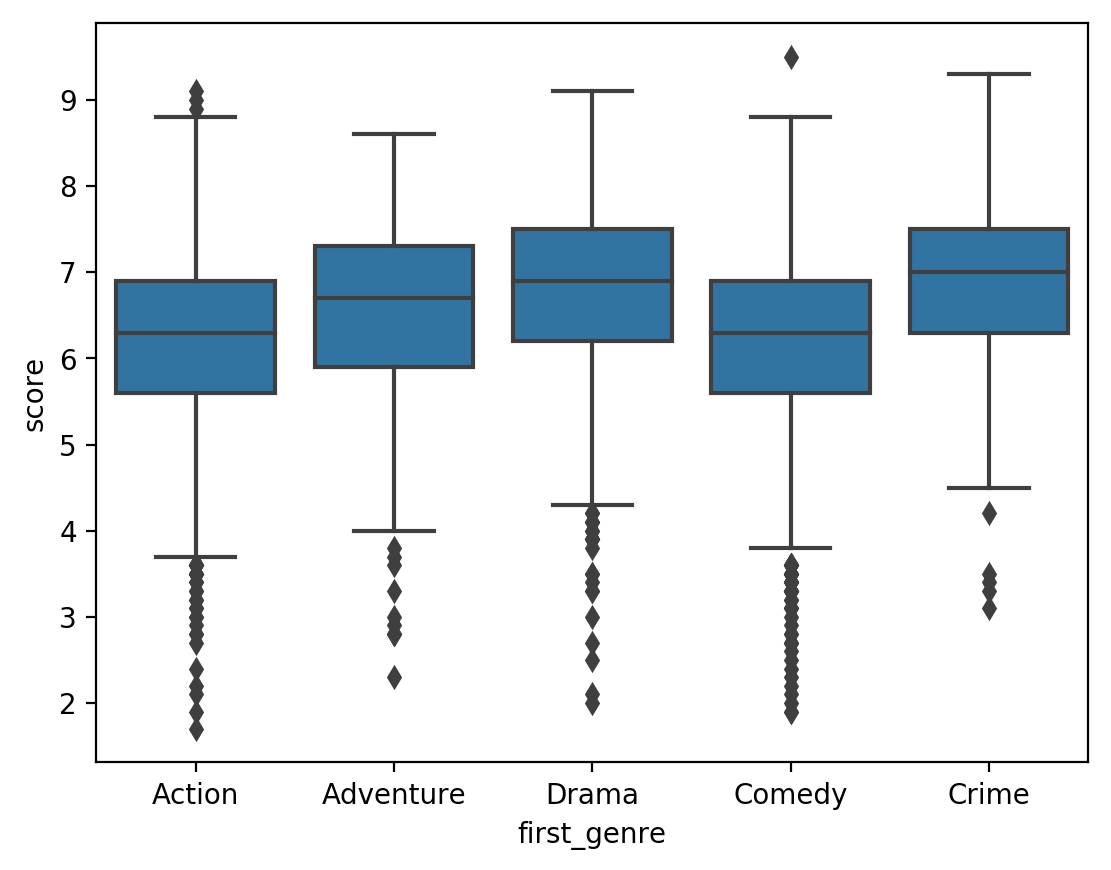

In [675]:
sns.boxplot(x='first_genre', y='score', 
            data=movies[movies.first_genre.isin(top_genres[:5])], 
            color='C0');

No matter how much we try to find it:

In [452]:
common_ratings = movies.content_rating.value_counts().index

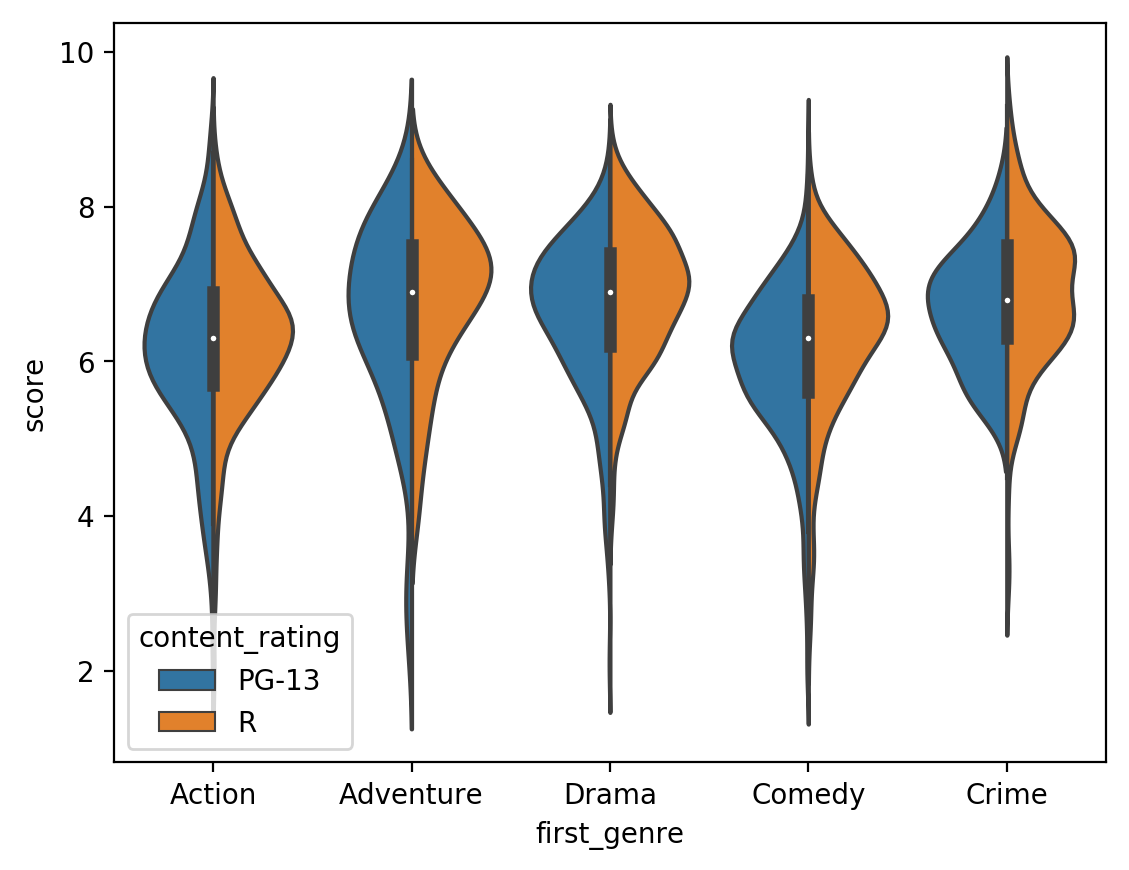

In [674]:
df = movies[
    movies.first_genre.isin(common_genres[:5]) & 
    movies.content_rating.isin(common_ratings[:2])
]

sns.violinplot(x='first_genre', y='score', hue='content_rating',
            split=True,
            data=df);

**ℹ️ Tip**: do not try to stretch and modify the charts just so seemingly interesting relationships can emerge. Sometimes, they just aren't there, and forcing them leads to misleading conclusions.

---

Do preferences change over time?

In [455]:
df = movies[
    movies.first_genre.isin(common_genres[:10]) &
    (movies.year >= 2000)
]

pivoted = pd.pivot_table(
    df,
    index='first_genre',
    columns='year',
    values='score',
    aggfunc='mean'
)

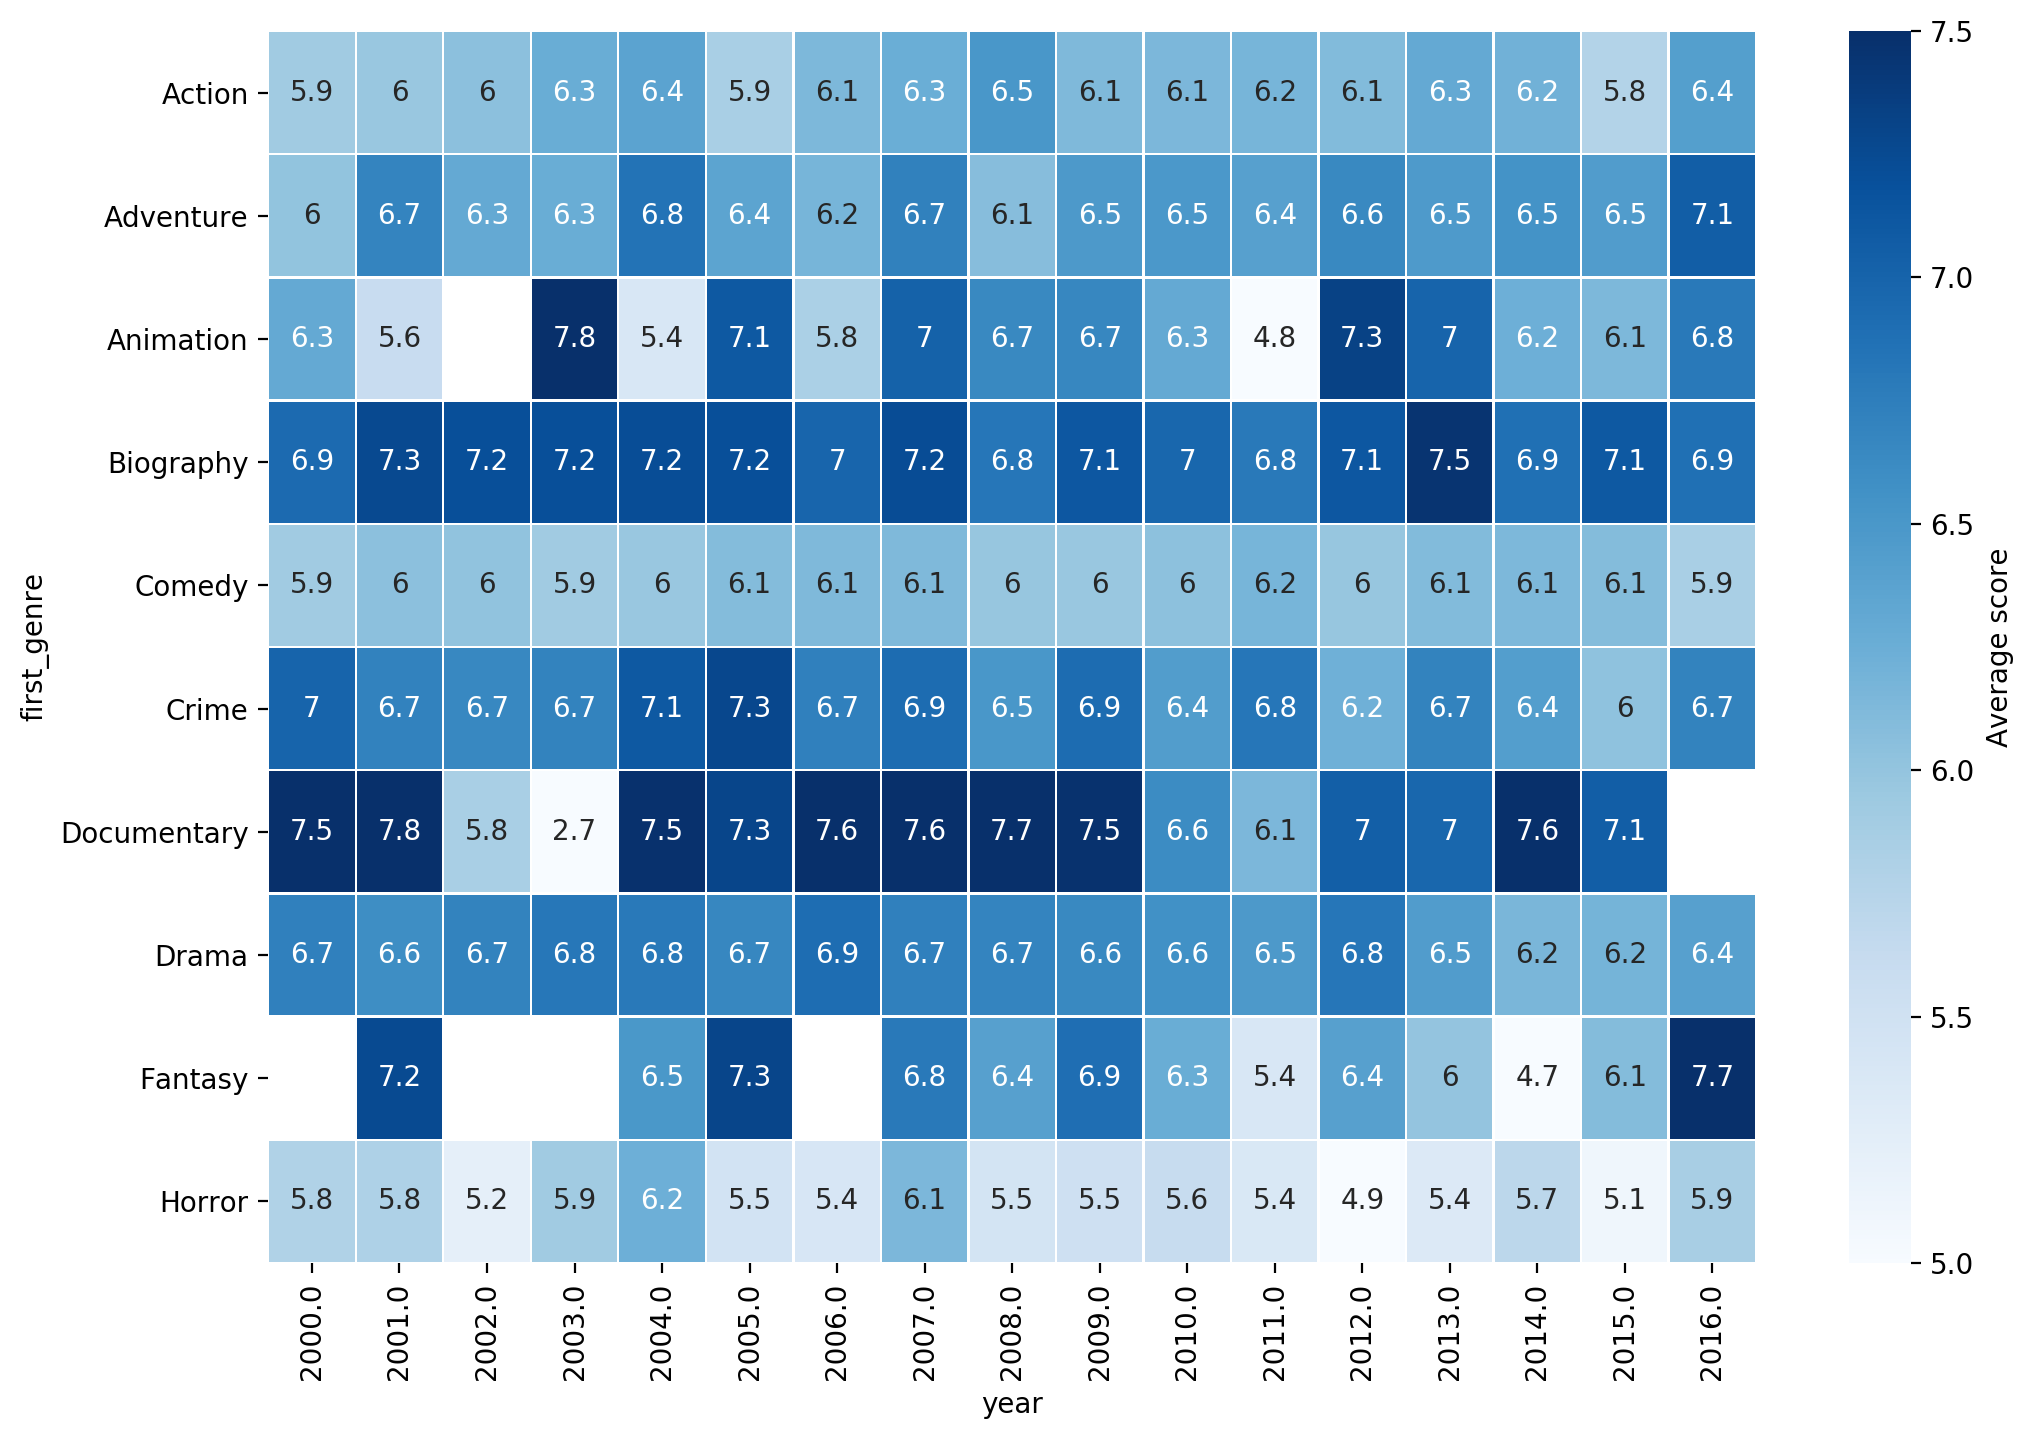

In [467]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivoted, 
    cmap='Blues', linewidth=.5,
    annot=True,
    cbar_kws={'label': 'Average score'},
    vmin=5, vmax=7.5,
);

---

But how many movies from each genre were there per year?

In [512]:
df = movies[
    movies.first_genre.isin(common_genres[:6]) &
    (movies.year >= 2000)
]

pivoted = pd.pivot_table(
    df,
    index='year',
    columns='first_genre',
    values='title',
    aggfunc='count'
)

pivoted = (pivoted.T / pivoted.sum(axis=1)).T

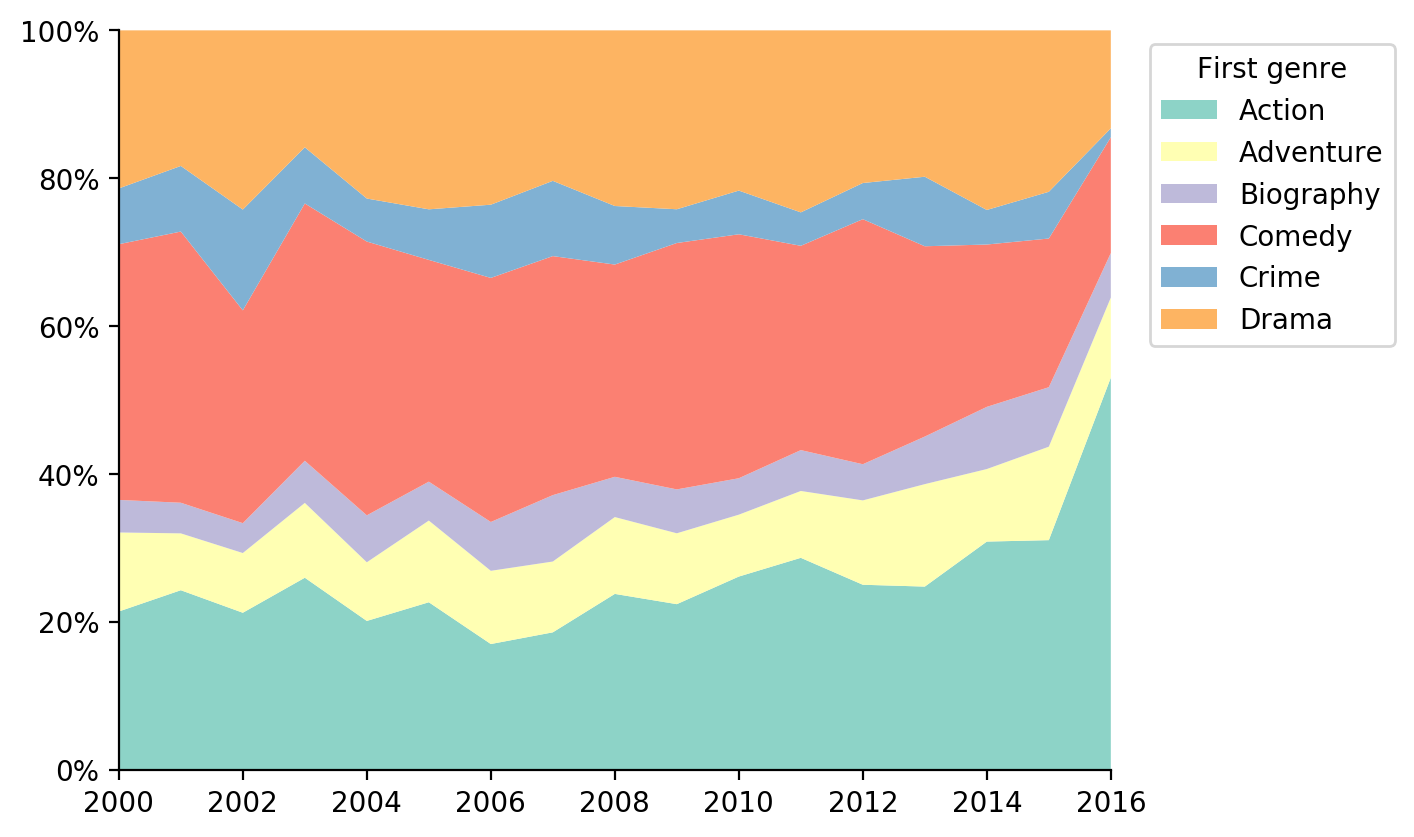

In [522]:
plt.stackplot(pivoted.index, [pivoted[col] for col in pivoted], 
              labels=pivoted.columns, 
              colors=sns.color_palette('Set3'))
plt.legend(bbox_to_anchor=(1.3, 1), title='First genre')

plt.margins(0, 0)
sns.despine()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y:.0%}'));

**ℹ️ Tip**: Plot at most 8 categorical colors. Any more and it becomes very hard to distinguish between shades.

---

And how do other factors interact with eacother?

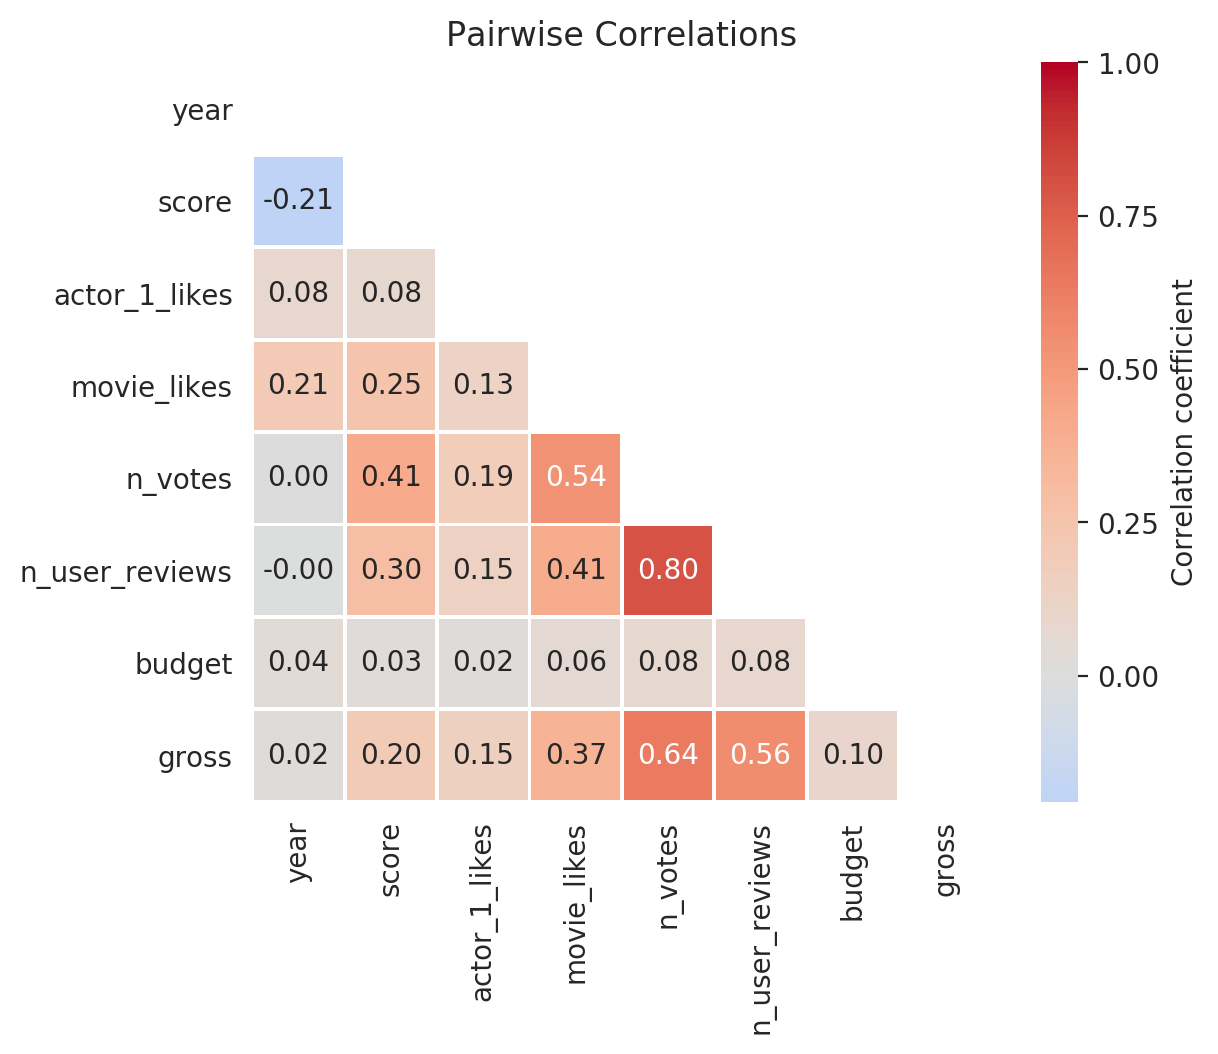

In [538]:
columns = ['year', 'score', 'actor_1_likes', 'movie_likes', 'n_votes', 'n_user_reviews', 'budget', 'gross']
corr = movies[columns].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(corr, 
                     mask=mask,
                     cbar_kws=dict(label='Correlation coefficient'),
                     cmap='coolwarm', 
                     center=0, #vmin=-.5, vmax=.5,
                     annot=True, 
                     fmt='.2f', 
                     lw=1,
                     square=True)
    
plt.title('Pairwise Correlations');

This confirms some intuitive relationships, e.g.: the number of reviews and votes on IMDB is correlated. But also some slightly less intuitive ones, e.g.: popularity translates across social media (i.e.: the number of interactions on IMDB is somewhat correlated to the number of interacions on Facebook). The other variable pairs are surprisingly uncorrelated.

**ℹ️ Tip**: investigate possible spurious correlations, especially in smaller datasets.

---

**💪 Exercise**: explore relationships between other variables (existing or composite)

## Practical Tips

### Outliers

**👾 Trivia**:  Bill Gates walks into a bar, and everyone inside of it becomes a millionaire... on average.

_Outliers_ are observations that lie outside the overall pattern of a distribution. They skew averages, make visualization more cumbersome, and violate statistical model assumptions.

In [562]:
values = movies.gross

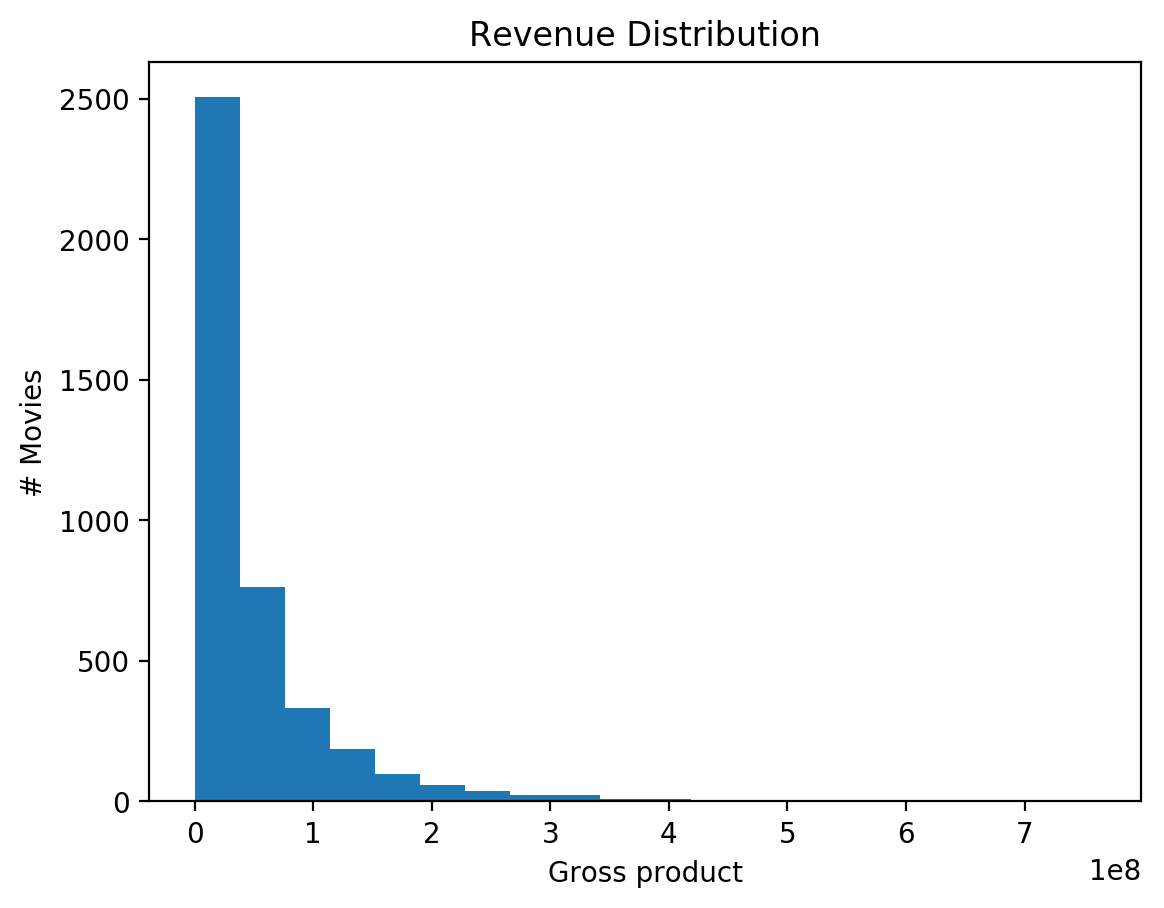

In [573]:
values.plot('hist', bins=20)

plt.xlabel('Gross product')
plt.title('Revenue Distribution')

plt.ylabel('# Movies');

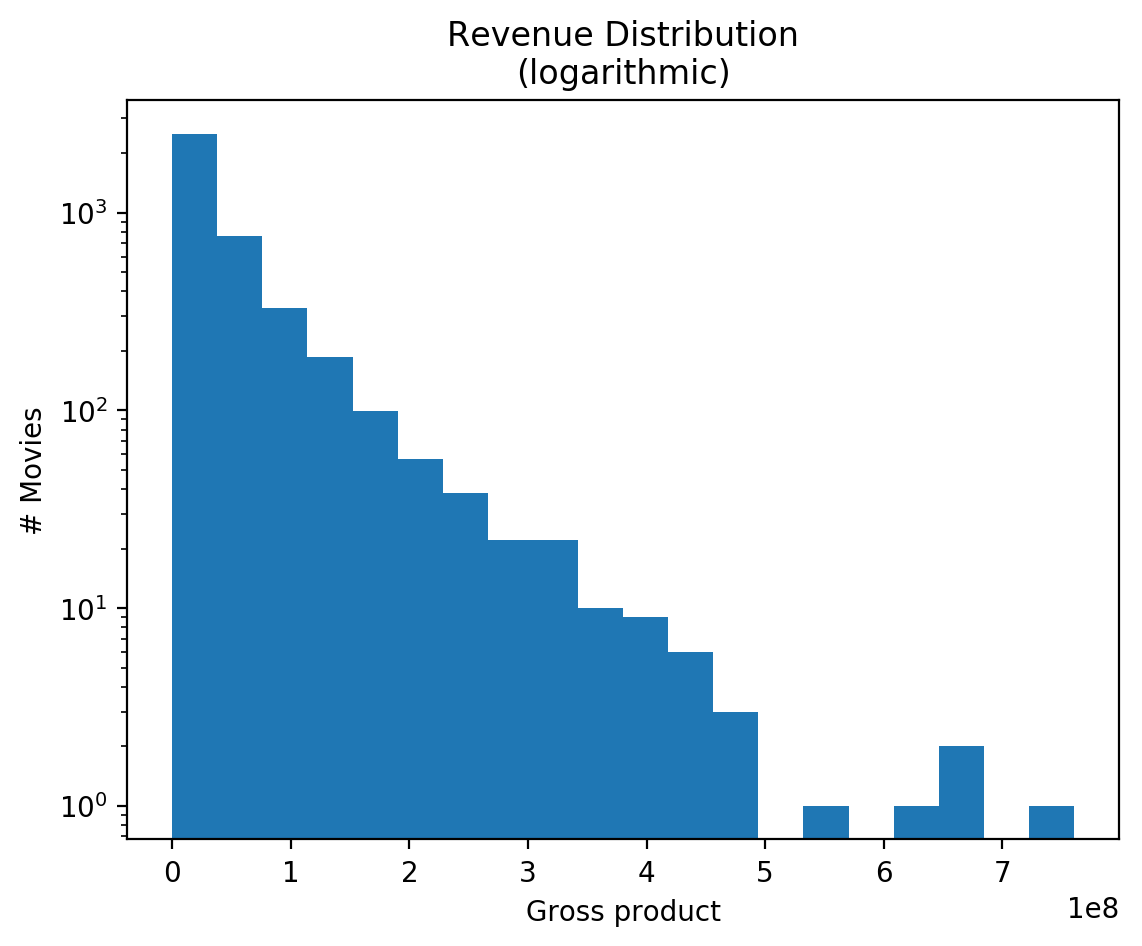

In [594]:
values.plot('hist', bins=20)

plt.xlabel('Gross product')
plt.title('Revenue Distribution\n(logarithmic)')
plt.yscale('log')

plt.ylabel('# Movies');

In [608]:
f'Maximum value: {max(values):,.0f}'

'Maximum value: 760,505,847'

In [632]:
values = values[~values.isnull()]  # ignore missing values

#### Detection

Outliers are hard to detect since there is no clear-cut definition, and they depend heavily on the data distribution.

In [616]:
def plot_outlier_cutoff(max_value, title):
    values.plot('hist', bins=20)
    plt.axvline(max_value, lw=3, color='C3', label='cutoff')

    plt.xlabel('Gross product')
    plt.ylabel('# Movies')
    
    plt.legend()
    plt.title(title)
    
    print(f'Cutoff at: {max_value:,.0f}')
    n_outliers = sum(values > max_value)
    print(f'Outliers detected: {n_outliers} ({(n_outliers / len(values)):.2%})')

One of the most simple methods is just ignoring a fixed percentage of the highest/lowest values:

Cutoff at: 326,289,085
Outliers detected: 41 (0.83%)


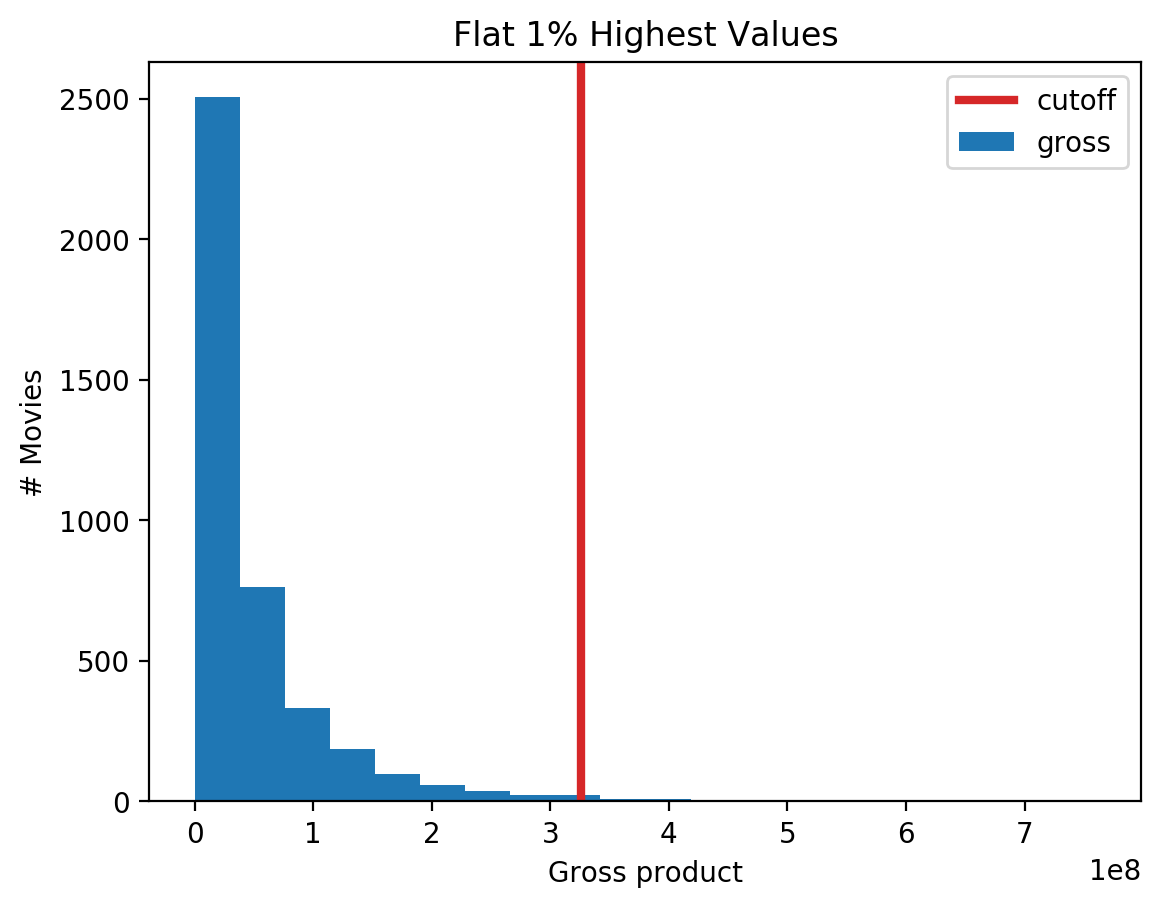

In [617]:
max_value = values.quantile(.99)
plot_outlier_cutoff(max_value, 'Flat 1% Highest Values')

---

We can go the boxplot route, and flag any points outside the interquartile range, but we might want to be a bit more strict with it:

Cutoff at: 255,849,336
Outliers detected: 88 (1.79%)


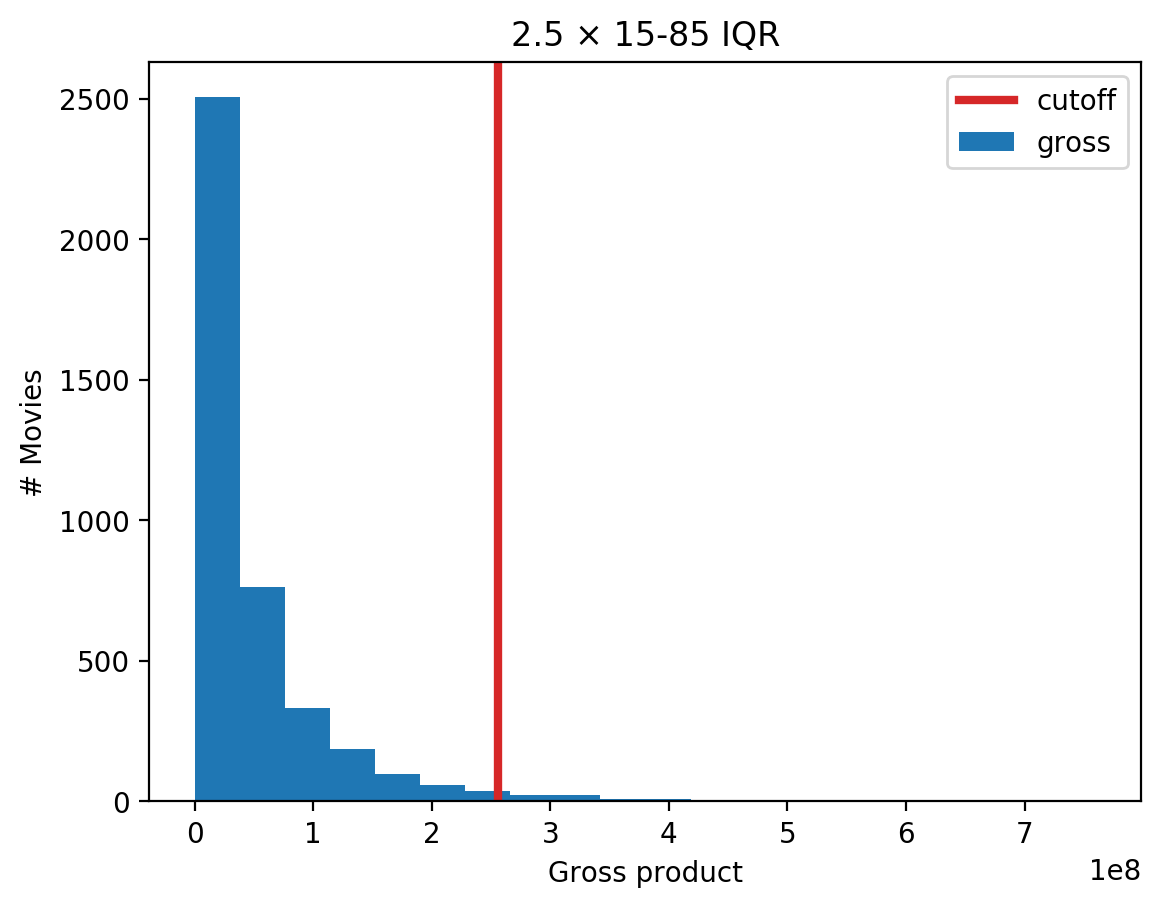

In [620]:
from scipy.stats import iqr
max_value = values.median() + 2.5 * iqr(values, rng=(15, 85), nan_policy='omit')
plot_outlier_cutoff(max_value, '2.5 × 15-85 IQR')

---

One of the most robust methods is normalization, via the Z-score (zero mean and unit variance). It is common to flag values that are three standard deviations away from the mean:

Cutoff at: 249,358,727
Outliers detected: 94 (2.32%)


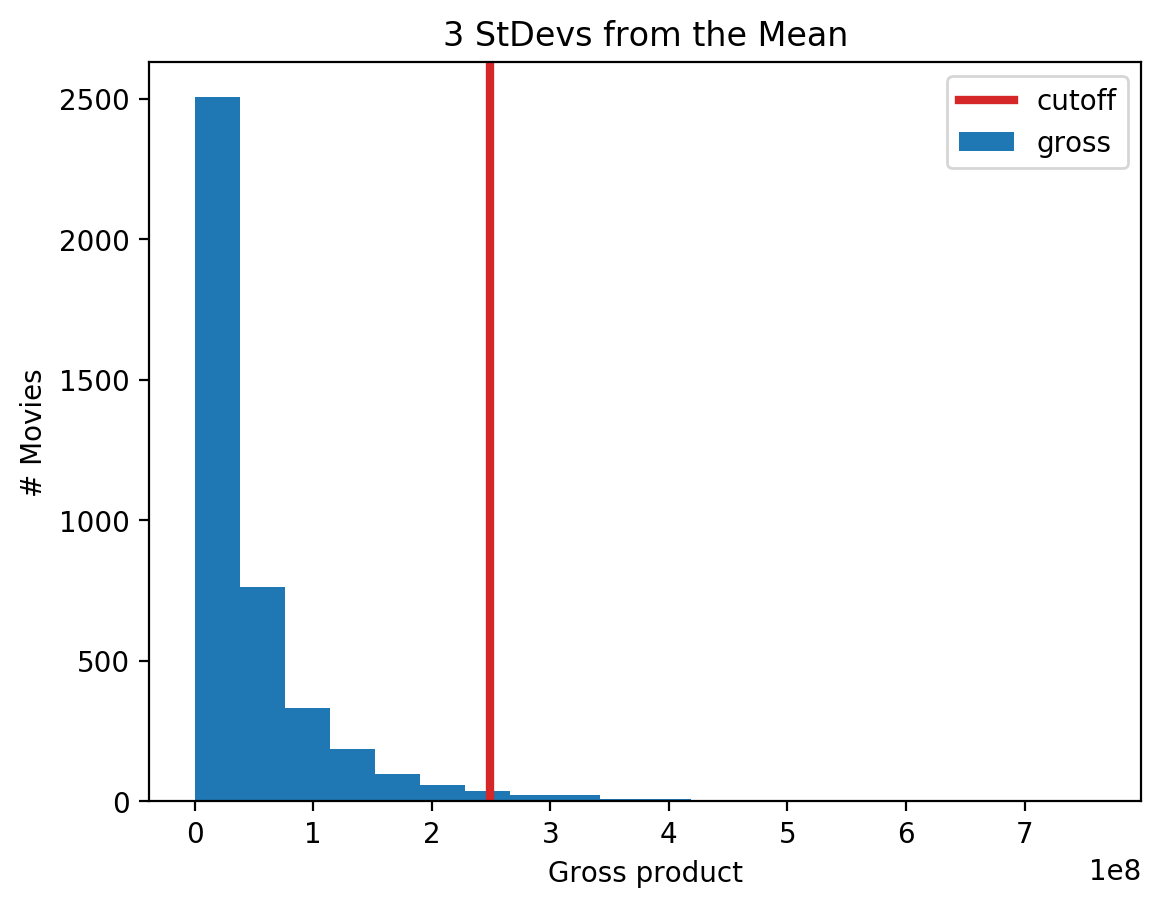

In [636]:
outlier_mask = abs(zscore(values)) > 3
max_value = max(values[~outlier_mask])
plot_outlier_cutoff(max_value, '3 StDevs from the Mean')

#### Handling

In [640]:
f'Mean: ${values.mean():,.0f}'

'Mean: $47,621,564'

When the values are anomalous, we can ignore them outright:

In [641]:
trimmed = values[values < max_value]
f'Mean: ${trimmed.mean():,.0f}'

'Mean: $40,573,563'

But when we would still like the observations to have some weight into aggregations, we can clip them, by replacing them with the highest admitted value:

In [642]:
windsorized = values.copy()
windsorized[values > max_value] = max_value
f'Mean: ${windsorized.mean():,.0f}'

'Mean: $45,463,749'

### Noise

Irregularities coming from either measurement imperfections or complex interactions can detract from seeing the overall trend:

In [224]:
avg_score_by_year = movies.groupby('year').score.mean()
x = avg_score_by_year.index.values
y = avg_score_by_year.values

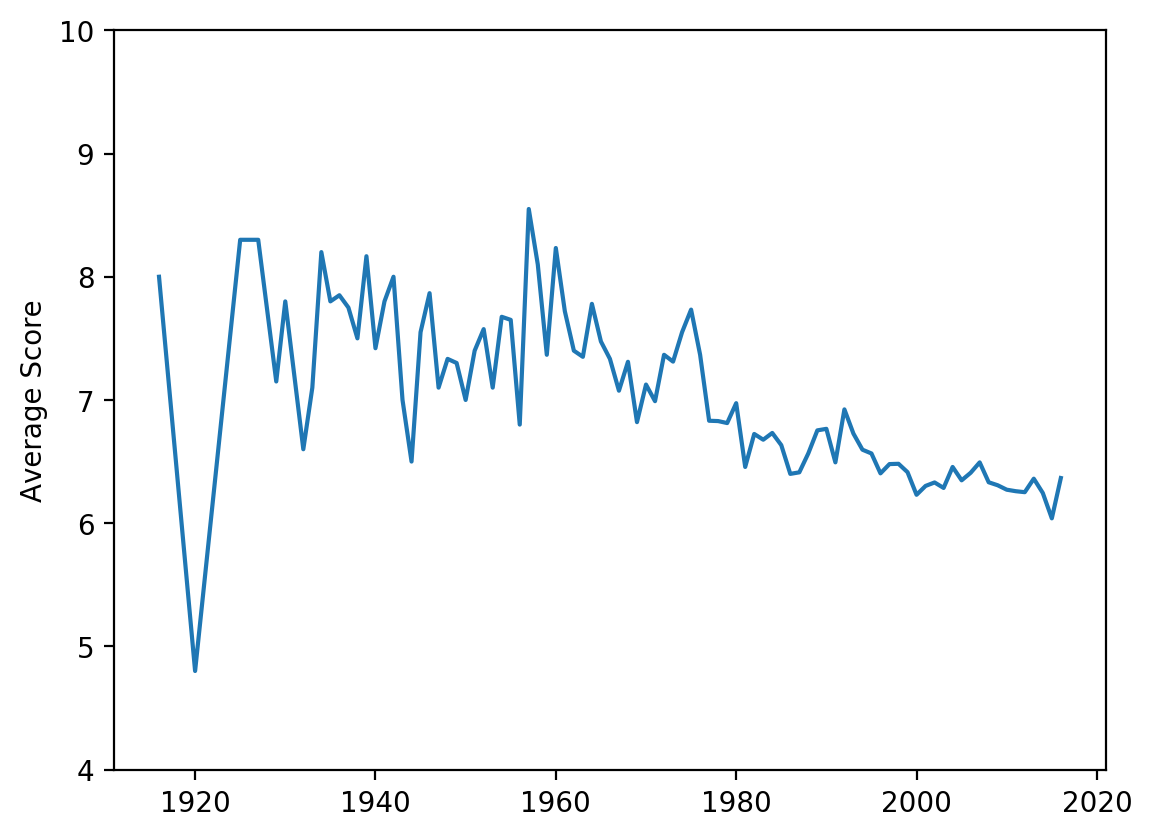

In [229]:
plt.plot(x, y)
plt.ylabel('Average Score')
plt.ylim(4, 10);

Averaging out points "smoothens" them out. Instead of using a rolling mean, we will use the _Savgol_ filter, which is very similar to it, but doesn't cut off elements at the ends.

In [193]:
from scipy.signal import savgol_filter

We can see the trends much clearer once we smoothen it out:

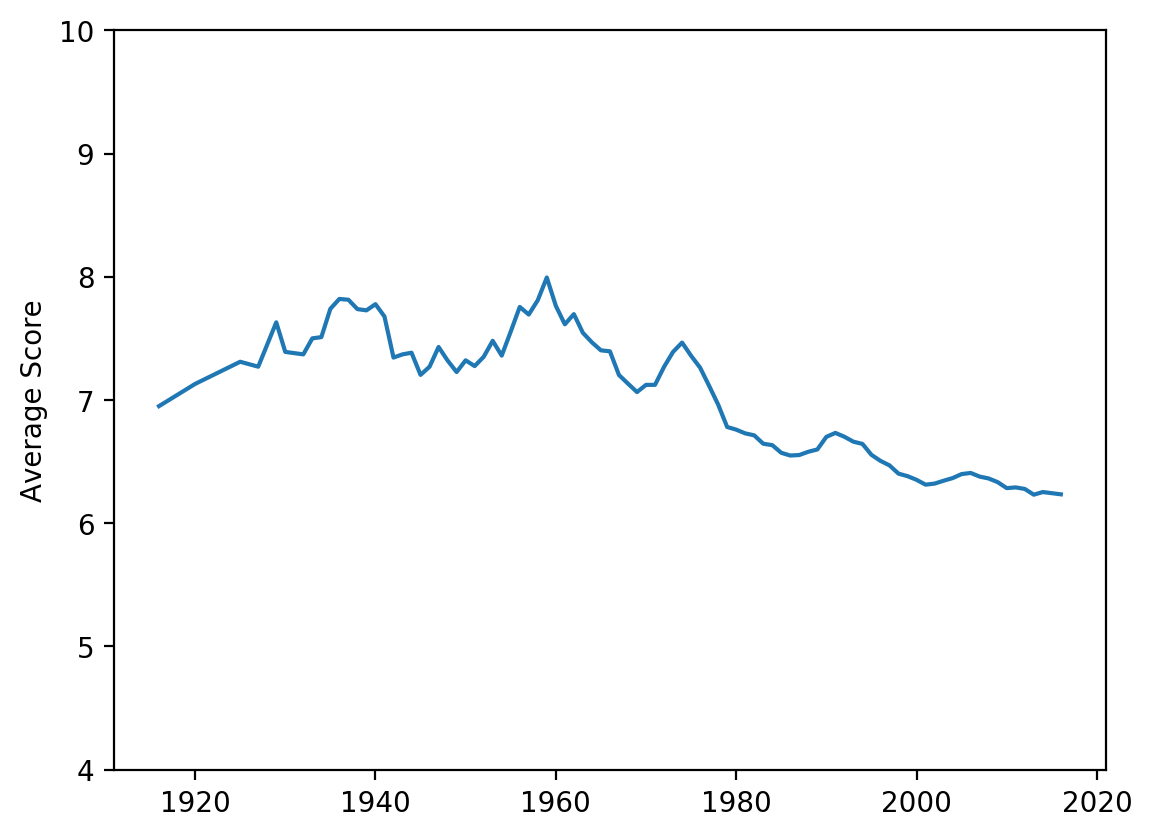

In [230]:
smoothened_y = savgol_filter(y, window_length=5, polyorder=1)  # look 2 years to the left and 2 years to the right

plt.plot(x, smoothened_y)
plt.ylabel('Average Score')
plt.ylim(4, 10);

---

Plotting any kind of line chart is an entails an interpolation, most commonly linear, as we choose the simplest model that fits. Rounded connections should never be used, as they create points that are not there.

In the next example, between Sophomore and Junior year, the student's GPA might have jumped as low as 3.0, but since we only have data from these two points in time, we cannot make any such assumptions, so we draw a straight line (blue line).

On the other hand, if we try to use round connections (orange line), the GPA jumps above 4.0 in this time period (red arrow) — which is not even possible!

<img src="https://i.imgur.com/diGk4QK.png" 
     style="width: 1000px"
     ></img>

### Averages

There are two common types of aggregations, all fitting the name of "average":
- mean: the arithmetic mean — each point contributes equally
- median: the point that would be at the middle of the list, were we to look at the ordered elements — robust to outliers

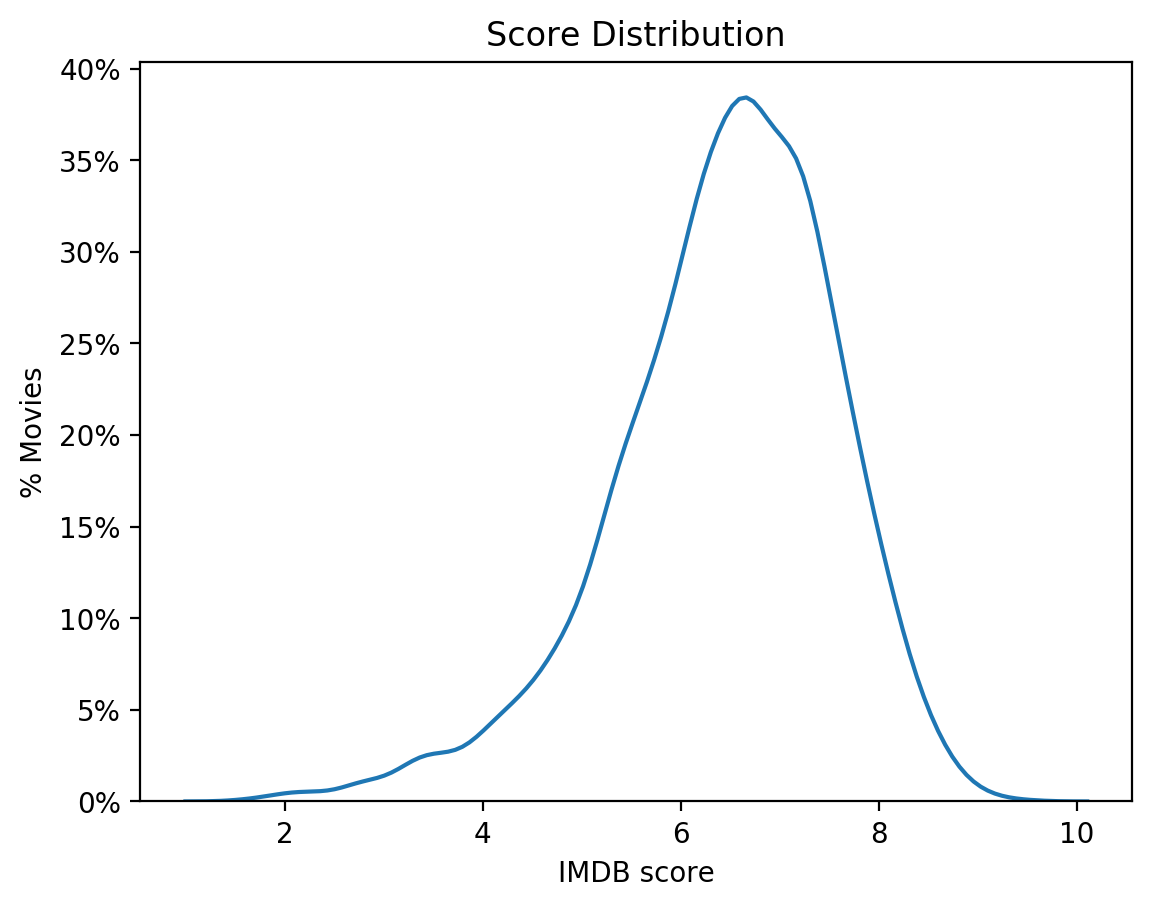

In [548]:
sns.kdeplot(movies.score, legend=False)

plt.xlabel('IMDB score')
plt.title('Score Distribution')

plt.ylabel('% Movies')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y:.0%}'));

For a relatively normally distributed sample, the mean and median are close to eachother:

In [673]:
print(f'Mean:   {movies.score.mean():.2f}')
print(f'Median: {movies.score.median():.2f}')

Mean:   6.44
Median: 6.60


---

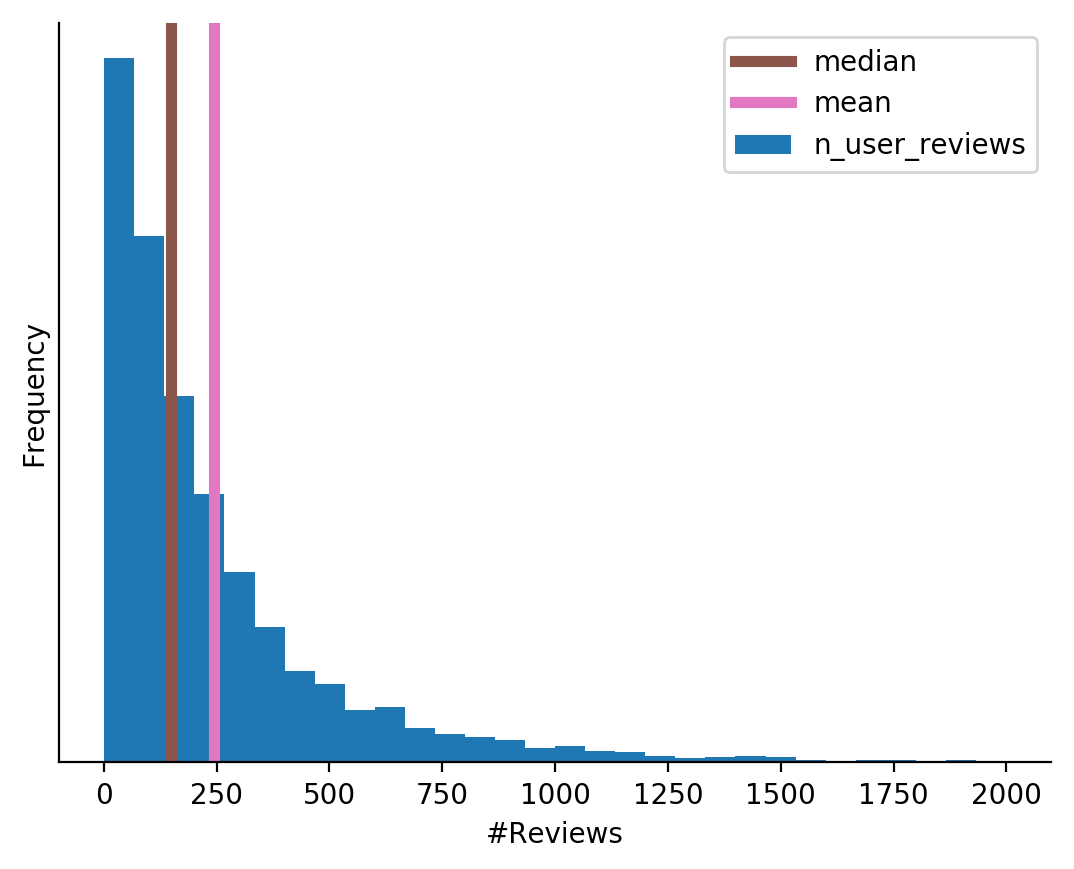

In [388]:
reviews = movies.n_user_reviews
reviews = reviews[
    (reviews < reviews.quantile(.99)) &  # ignore 1% outliers
    ~reviews.isnull()  # and missing values
]

plt.axvline(reviews.median(), lw=4, color='C5', label='median')
plt.axvline(reviews.mean(),   lw=4, color='C6', label='mean')

plt.xlabel('#Reviews')
plt.ylabel('Frequency')
plt.yticks([])

reviews.plot('hist', bins=30)
sns.despine()

plt.legend();

But for long-tailed distributions, the median is nearly twice as large as the mean:

In [670]:
print(f'Mean:   {reviews.mean():.2f}')
print(f'Median: {reviews.median():.2f}')

Mean:   243.54
Median: 150.00


**ℹ️ Tip**: be weary of vague statistical terms that are used for support. When talking about the distribution of wages in a company, a journalist seeking to highlight financial inequality might use the median. While a PR representative seeking to attract new talent might use the nearly twice as large mean. Both measures are true, but context is key.

---

A third kind of "average" is the mode — the most frequent element. It makes sense when dealing with categorical data

In [341]:
orders = movies.poster_order
orders = values[
    (orders < orders.quantile(.99)) &  # ignore 1% outliers
    ~orders.isnull()  # and missing values
].astype(int)

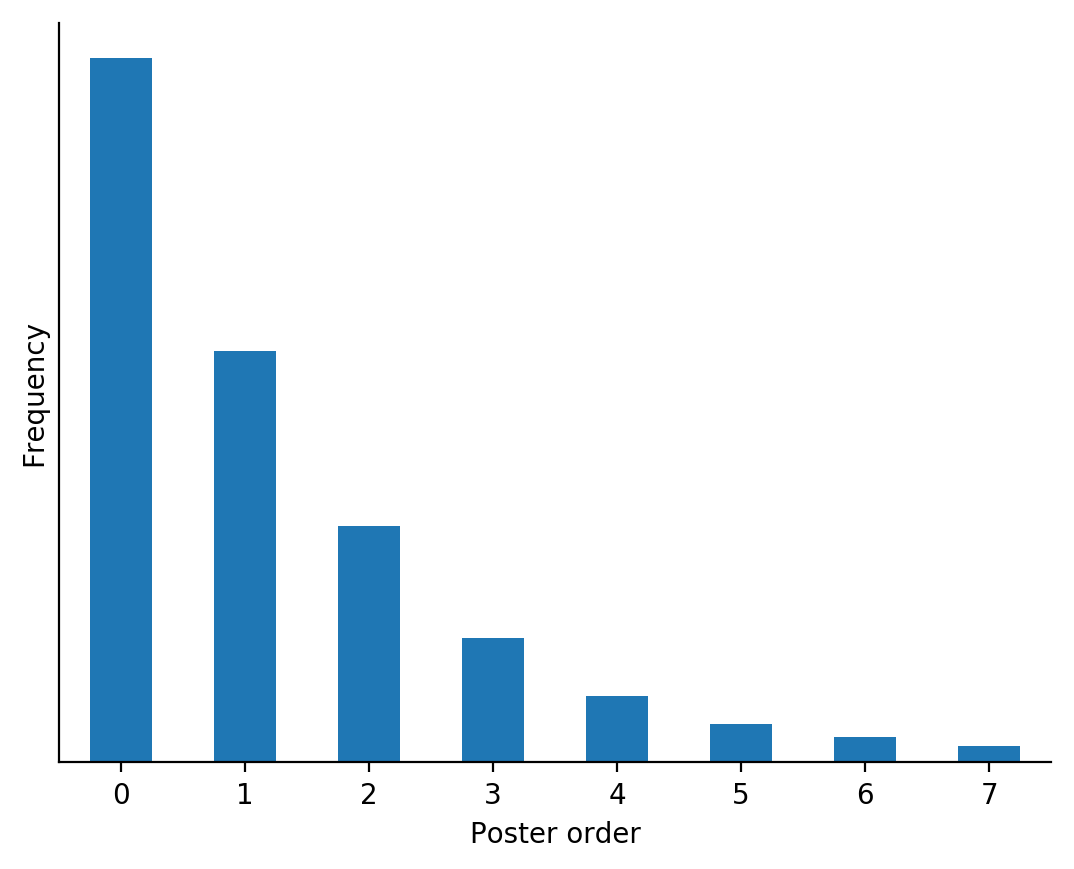

In [342]:
orders.value_counts().plot(kind='bar', color='C0', rot=0, label='frequency')

plt.xlabel('Poster order')
plt.ylabel('Frequency')
plt.yticks([])

sns.despine();

In [343]:
print(f'Mean:   {orders.mean():.2f}')
print(f'Median: {orders.median():.2f}')
print(f'Mode:   {orders.mode()[0]:.2f}')

Mean:   1.22
Median: 1.00
Mode:   0.00


---

Not only outliers and long-tailed distributions caused this, but twin-peaked ones as well. You can play with the following widget to explore this relationship:

In [671]:
import ipywidgets
from ipywidgets import interact

from IPython.display import clear_output

In [672]:
def plot_dist(amount=500, distance=10, variance=1.0):
    dist = np.concatenate([
        np.random.normal(0, .5, 5_000),
        np.random.normal(distance, variance, amount),  # higher one
    ])
    
    clear_output()
    sns.kdeplot(dist, label='distribution')
    
    plt.axvline(np.median(dist), lw=3, color='C5', label='median')
    plt.axvline(np.mean(dist),   lw=3, color='C6', label='mean')

    plt.xlabel('Values range')
    plt.ylabel('% Values')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{y:.0%}'))
    
    plt.ylim(0, .75)
    plt.xlim(-3, 15)
    
    plt.title('Comparison of Averages')
    plt.legend()

interact(
    plot_dist, 
    amount=(50, 20_000, 500),
    distance=(1, 15),
    variance=(.01, 10),
);

interactive(children=(IntSlider(value=500, description='amount', max=20000, min=50, step=500), IntSlider(value…

---

**💪 Exercise**: try your hand at exploring the [Titanic Dataset](http://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html)

## Further Reading

- [Statistical Fallacies](https://www.geckoboard.com/learn/data-literacy/statistical-fallacies/)
- [Statitical Data Exploration Example](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)